## Imports and Function declarations

In [1161]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
)
from sklearn.svm import (
    SVC,
    SVR,
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor,
)

from sklearn.metrics import (
    roc_curve,
    auc,
    classification_report,
    mean_squared_error,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)

In [1162]:
def plotROC(clf, XTest, QTest, probs=True):
    if (probs == True):
        probs = clf.predict_proba(XTest)
        preds = probs[:,1]
    else:
        preds = clf.decision_function(XTest)
    
    fpr, tpr, threshold = roc_curve(QTest, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [1163]:
def discreteAlcohol(df):
    df["alcohol_cat"] = 'L'
    mean = df["alcohol"].mean()
    stddev = df["alcohol"].std()
    for index, series in df.iterrows():
        alcohol = series["alcohol"]
        if alcohol < (mean-stddev):
            df.loc[index, "alcohol_cat"] = 'L'
        elif alcohol > (mean+stddev):
            df.loc[index, "alcohol_cat"] = 'H'
        else:
            df.loc[index, "alcohol_cat"] = 'M'

In [1164]:
def discreteSugar(df):
    df["isSweet"] = 0
    threshold = df["residual sugar"].median()

    for index, series in df.iterrows():
        sugar = series["residual sugar"]
        if sugar < threshold:
            df.loc[index, "isSweet"] = 0
        else:
            df.loc[index, "isSweet"] = 1

In [1165]:
path = 'https://raw.githubusercontent.com/Jonezy11/CSC2034/master/data/'
data_w = pd.read_csv(path + "winequality-white.csv", header=0, sep=';')
data_r = pd.read_csv(path + "winequality-red.csv", header=0, sep=';')

## Initial Exploration of Datasets

### Quality Distribution

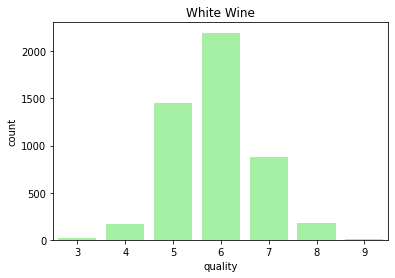

In [1166]:
g = sns.countplot(data=data_w, x="quality", color='palegreen').set(title = "White Wine")

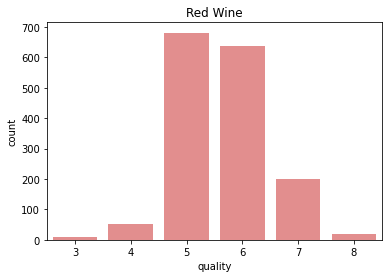

In [1167]:
g = sns.countplot(data=data_r, x="quality", color='lightcoral').set(title = "Red Wine")

### Discretising Alcohol Content

In [1168]:
discreteAlcohol(data_w)
discreteAlcohol(data_r)

### Quality Distribution against Alcohol Content

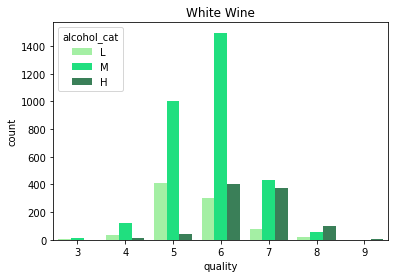

In [1169]:
g = sns.countplot(data=data_w, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"palegreen",'M':"springgreen",'H':"seagreen"}).set(title = "White Wine")

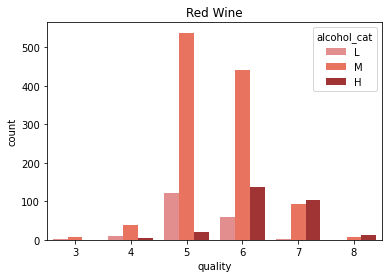

In [1170]:
g = sns.countplot(data=data_r, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"lightcoral",'M':"tomato",'H':"firebrick"}).set(title = "Red Wine")

### Residual Sugar Analysis

#### White Wine

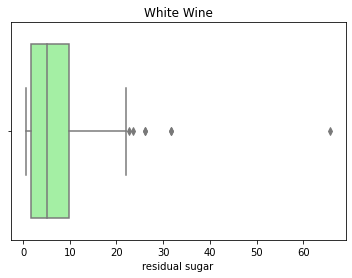

In [1171]:
g = sns.boxplot(data=data_w, x='residual sugar', color='palegreen').set(title = "White Wine")

Discretising sugar content

In [1172]:
discreteSugar(data_w)

Dataset is evenly split

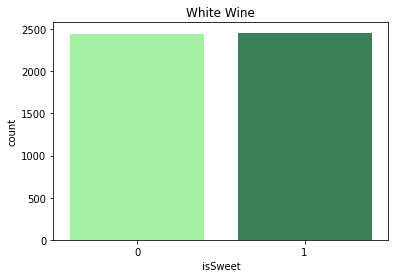

In [1173]:
g = sns.countplot(data=data_w, x="isSweet", palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

In [1174]:
data_w["isSweet"].value_counts()

1    2458
0    2440
Name: isSweet, dtype: int64

#### Red Wine

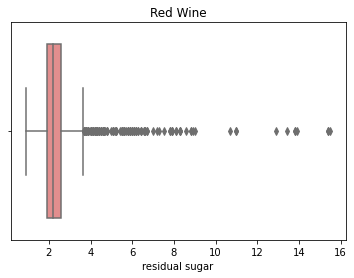

In [1175]:
g = sns.boxplot(data=data_r, x='residual sugar', color='lightcoral').set(title = "Red Wine")

Discretising sugar content

In [1176]:
discreteSugar(data_r)

Dataset is evenly split

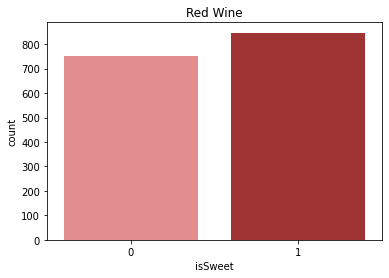

In [1177]:
g = sns.countplot(data=data_r, x="isSweet", palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

In [1178]:
data_r["isSweet"].value_counts()

1    847
0    752
Name: isSweet, dtype: int64

### Quality Distribution against Residual Sugar

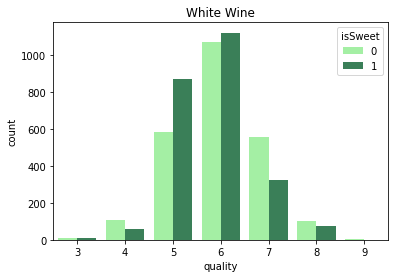

In [1179]:
g = sns.countplot(data=data_w, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

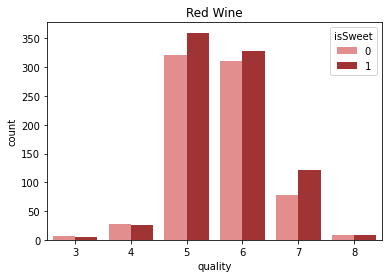

In [1180]:
g = sns.countplot(data=data_r, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

## Variable Correlations

### White Wine

#### Scatter Plots with Regression Lines

##### [Fixed Acidity]

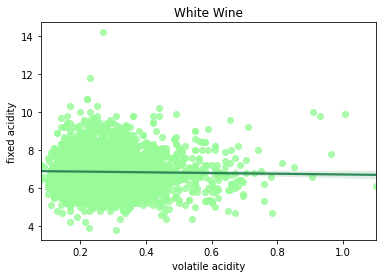

In [770]:
g = sns.regplot(data=data_w, x="volatile acidity", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

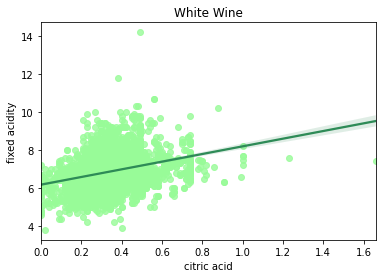

In [771]:
g = sns.regplot(data=data_w, x="citric acid", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

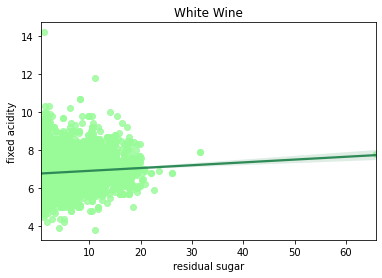

In [772]:
g = sns.regplot(data=data_w, x="residual sugar", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

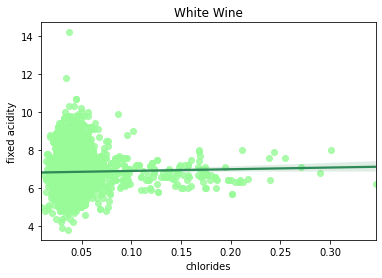

In [773]:
g = sns.regplot(data=data_w, x="chlorides", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

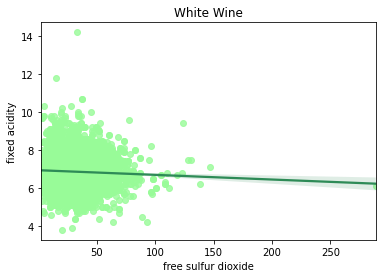

In [774]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

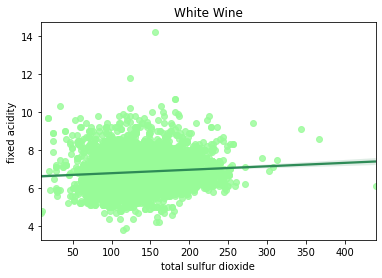

In [775]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

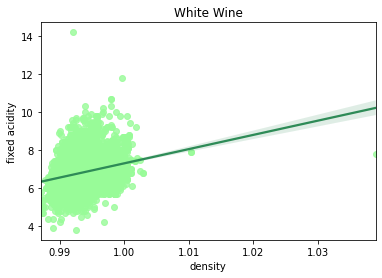

In [776]:
g = sns.regplot(data=data_w, x="density", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

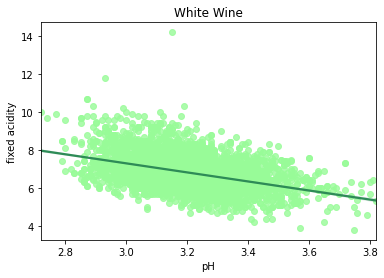

In [777]:
g = sns.regplot(data=data_w, x="pH", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

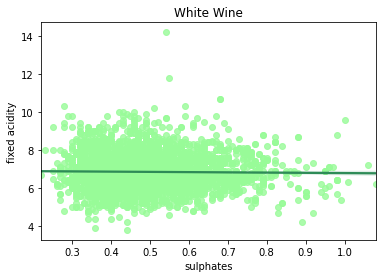

In [778]:
g = sns.regplot(data=data_w, x="sulphates", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

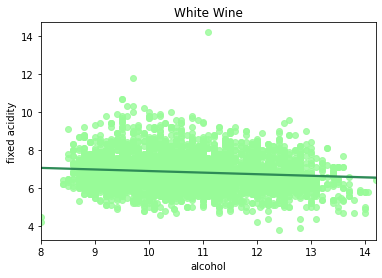

In [779]:
g = sns.regplot(data=data_w, x="alcohol", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Volatile Acidity]

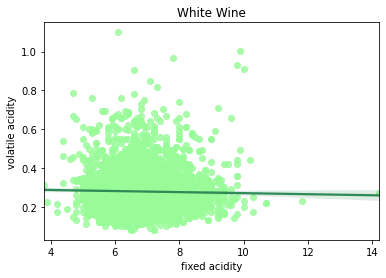

In [780]:
g = sns.regplot(data=data_w, x="fixed acidity", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

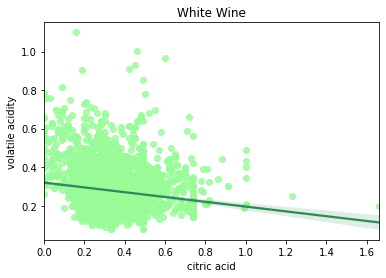

In [781]:
g = sns.regplot(data=data_w, x="citric acid", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

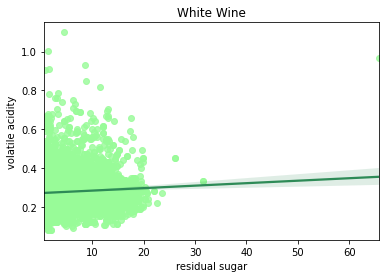

In [782]:
g = sns.regplot(data=data_w, x="residual sugar", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

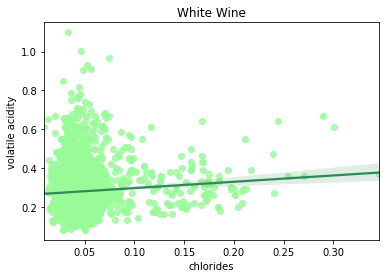

In [783]:
g = sns.regplot(data=data_w, x="chlorides", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

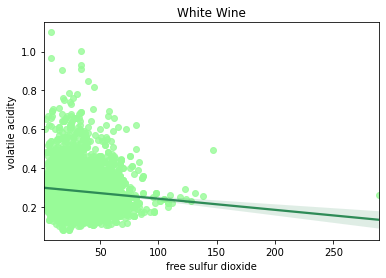

In [784]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

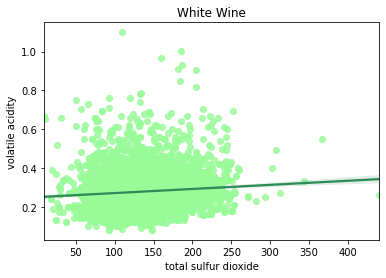

In [785]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

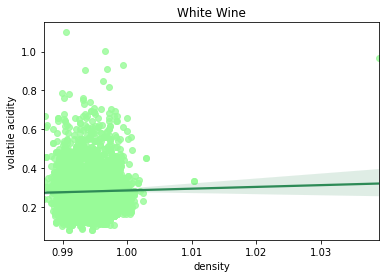

In [786]:
g = sns.regplot(data=data_w, x="density", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

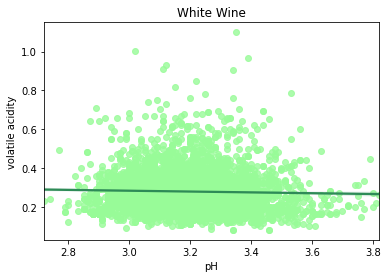

In [787]:
g = sns.regplot(data=data_w, x="pH", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

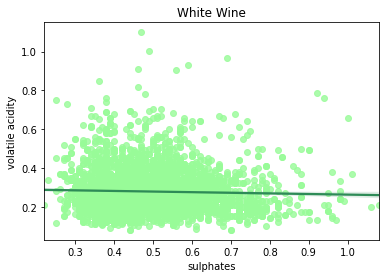

In [788]:
g = sns.regplot(data=data_w, x="sulphates", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

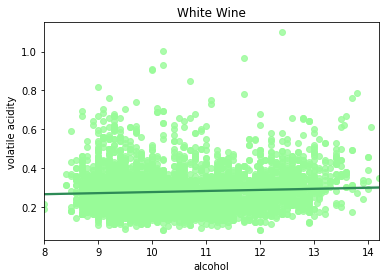

In [789]:
g = sns.regplot(data=data_w, x="alcohol", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Citric Acid]

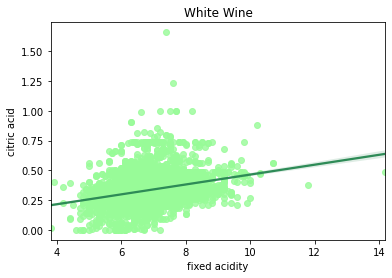

In [790]:
g = sns.regplot(data=data_w, x="fixed acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

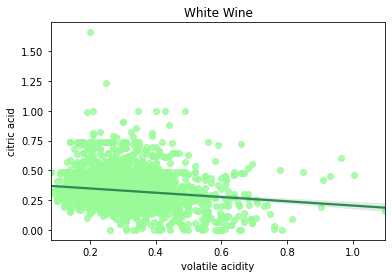

In [791]:
g = sns.regplot(data=data_w, x="volatile acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

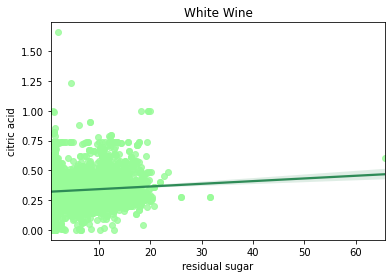

In [792]:
g = sns.regplot(data=data_w, x="residual sugar", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

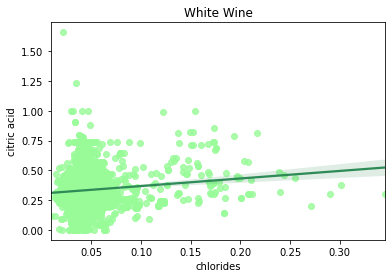

In [793]:
g = sns.regplot(data=data_w, x="chlorides", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

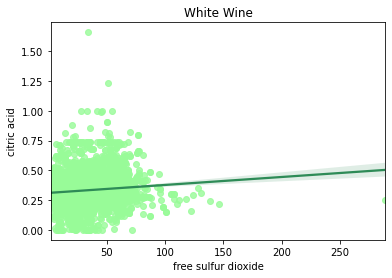

In [794]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

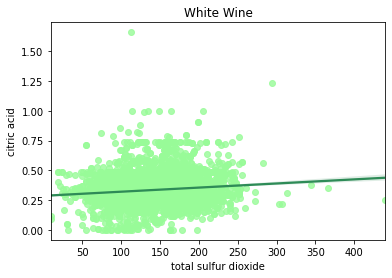

In [795]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

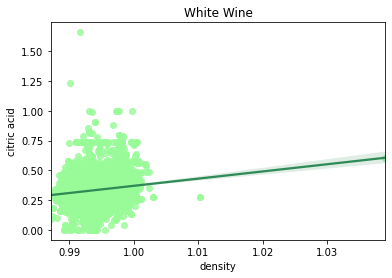

In [796]:
g = sns.regplot(data=data_w, x="density", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

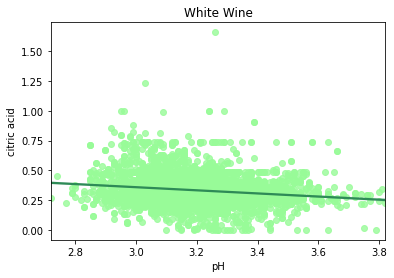

In [797]:
g = sns.regplot(data=data_w, x="pH", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

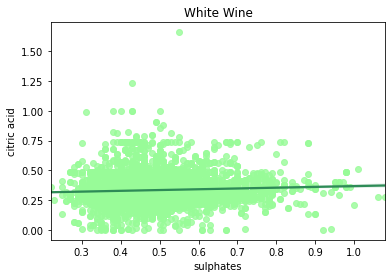

In [798]:
g = sns.regplot(data=data_w, x="sulphates", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

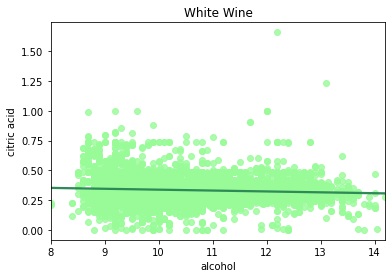

In [799]:
g = sns.regplot(data=data_w, x="alcohol", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Residual Sugar]

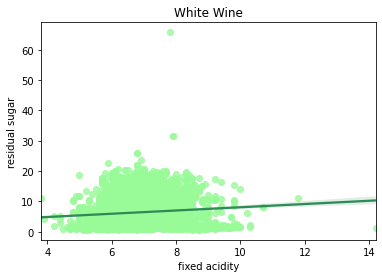

In [800]:
g = sns.regplot(data=data_w, x="fixed acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

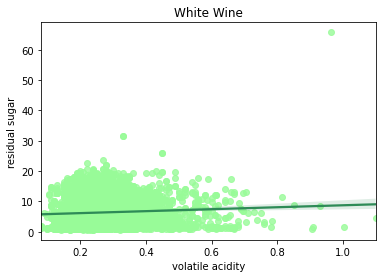

In [801]:
g = sns.regplot(data=data_w, x="volatile acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

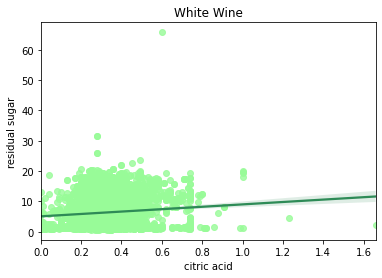

In [802]:
g = sns.regplot(data=data_w, x="citric acid", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

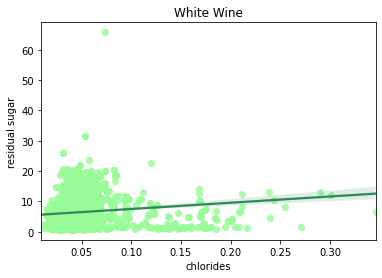

In [803]:
g = sns.regplot(data=data_w, x="chlorides", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

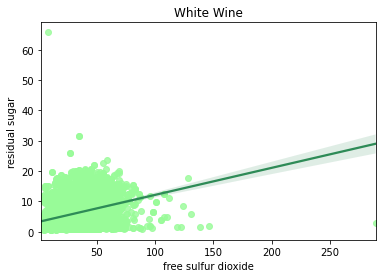

In [804]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

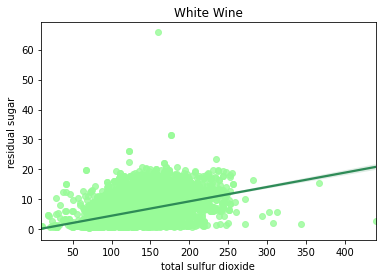

In [805]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

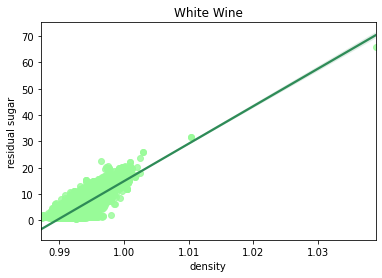

In [806]:
g = sns.regplot(data=data_w, x="density", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

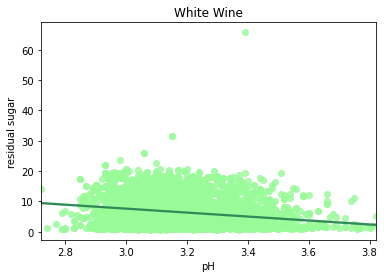

In [807]:
g = sns.regplot(data=data_w, x="pH", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

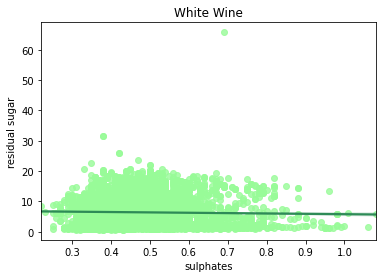

In [808]:
g = sns.regplot(data=data_w, x="sulphates", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

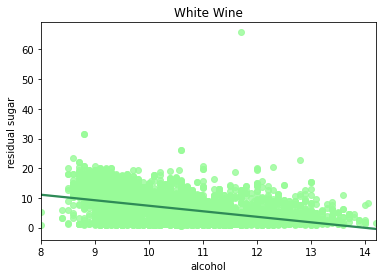

In [809]:
g = sns.regplot(data=data_w, x="alcohol", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Chlorides]

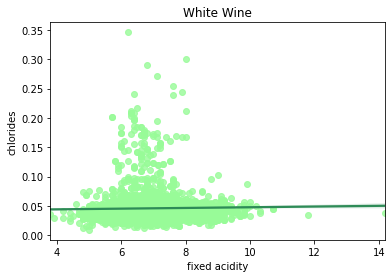

In [810]:
g = sns.regplot(data=data_w, x="fixed acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

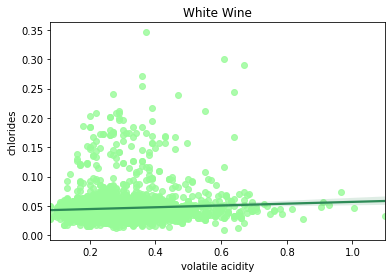

In [811]:
g = sns.regplot(data=data_w, x="volatile acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

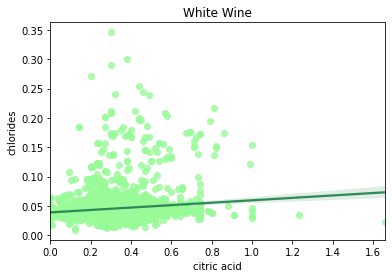

In [812]:
g = sns.regplot(data=data_w, x="citric acid", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

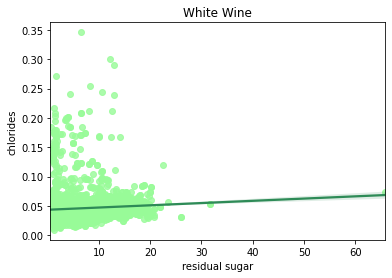

In [813]:
g = sns.regplot(data=data_w, x="residual sugar", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

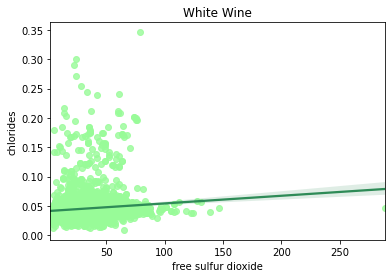

In [814]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

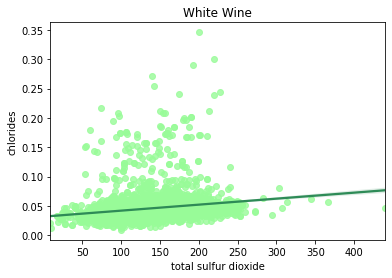

In [815]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

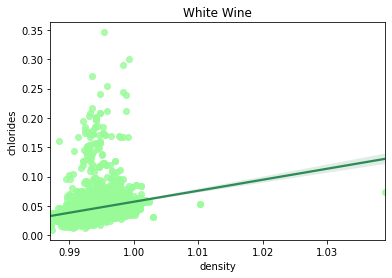

In [816]:
g = sns.regplot(data=data_w, x="density", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

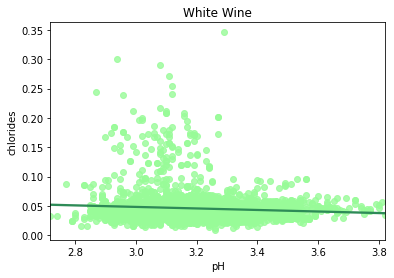

In [817]:
g = sns.regplot(data=data_w, x="pH", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

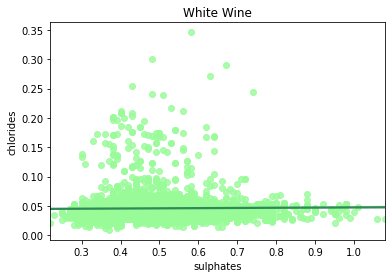

In [818]:
g = sns.regplot(data=data_w, x="sulphates", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

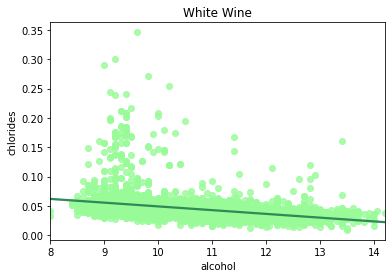

In [819]:
g = sns.regplot(data=data_w, x="alcohol", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Free Sulfur Dioxide]

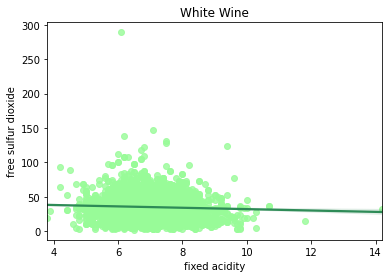

In [820]:
g = sns.regplot(data=data_w, x="fixed acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

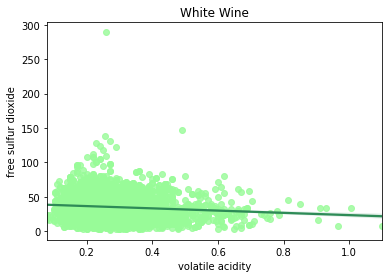

In [821]:
g = sns.regplot(data=data_w, x="volatile acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

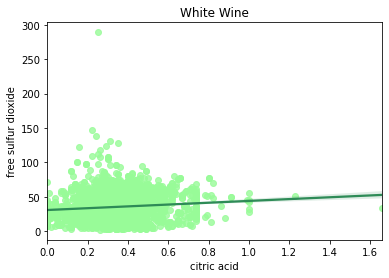

In [822]:
g = sns.regplot(data=data_w, x="citric acid", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

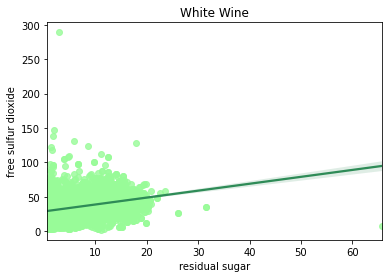

In [823]:
g = sns.regplot(data=data_w, x="residual sugar", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

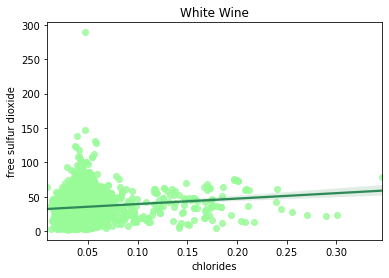

In [824]:
g = sns.regplot(data=data_w, x="chlorides", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

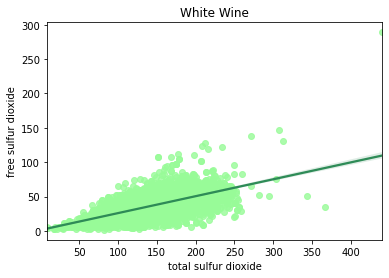

In [825]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

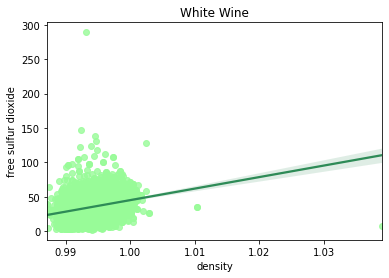

In [826]:
g = sns.regplot(data=data_w, x="density", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

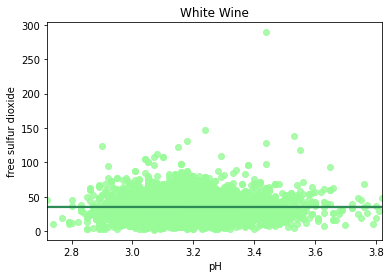

In [827]:
g = sns.regplot(data=data_w, x="pH", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

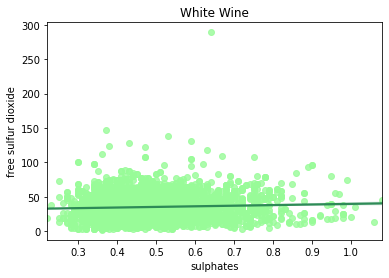

In [828]:
g = sns.regplot(data=data_w, x="sulphates", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

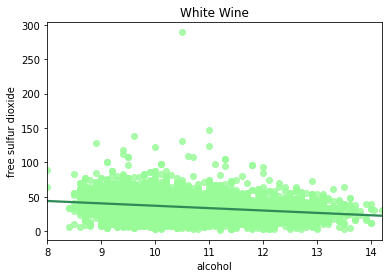

In [829]:
g = sns.regplot(data=data_w, x="alcohol", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Total Sulfur Dioxide]

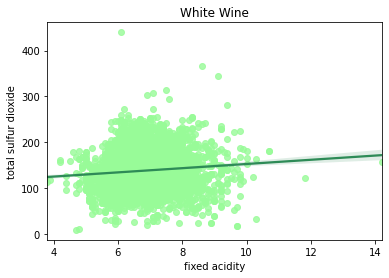

In [830]:
g = sns.regplot(data=data_w, x="fixed acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

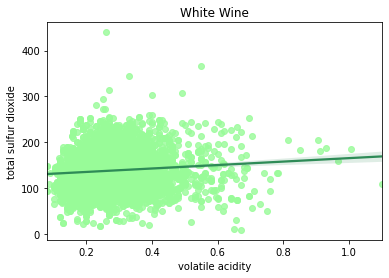

In [831]:
g = sns.regplot(data=data_w, x="volatile acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

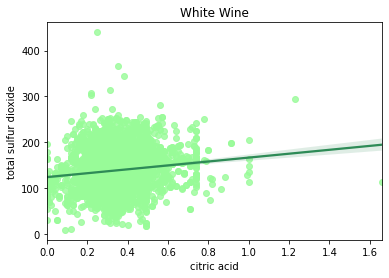

In [832]:
g = sns.regplot(data=data_w, x="citric acid", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

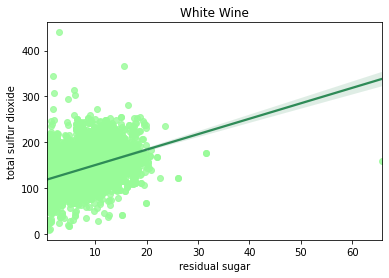

In [833]:
g = sns.regplot(data=data_w, x="residual sugar", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

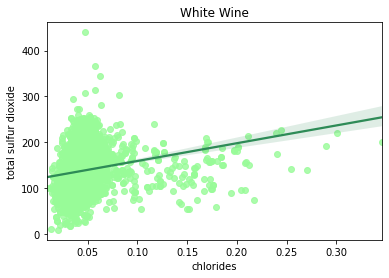

In [834]:
g = sns.regplot(data=data_w, x="chlorides", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

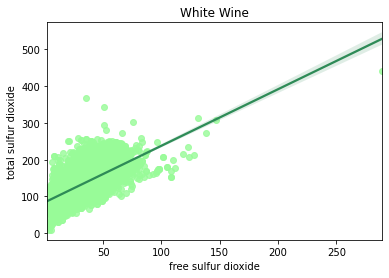

In [835]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

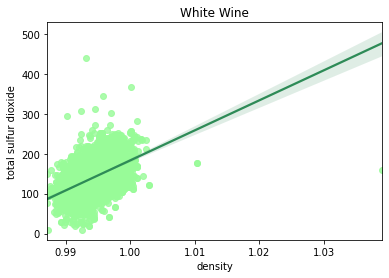

In [836]:
g = sns.regplot(data=data_w, x="density", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

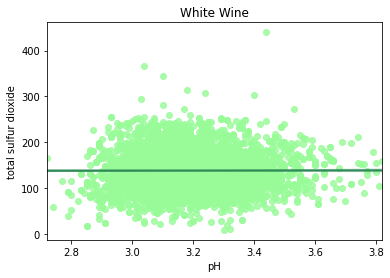

In [837]:
g = sns.regplot(data=data_w, x="pH", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

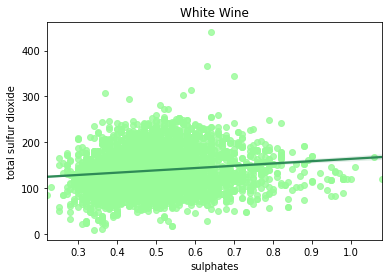

In [838]:
g = sns.regplot(data=data_w, x="sulphates", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

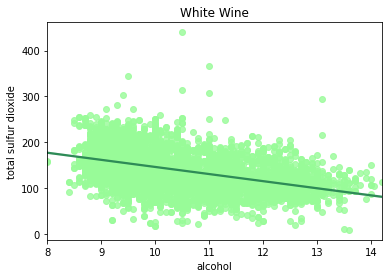

In [839]:
g = sns.regplot(data=data_w, x="alcohol", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Density]

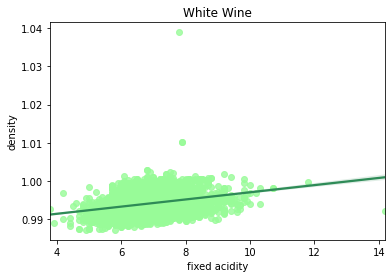

In [840]:
g = sns.regplot(data=data_w, x="fixed acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

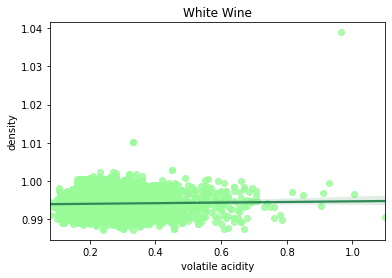

In [841]:
g = sns.regplot(data=data_w, x="volatile acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

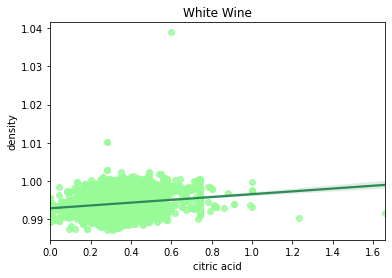

In [842]:
g = sns.regplot(data=data_w, x="citric acid", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

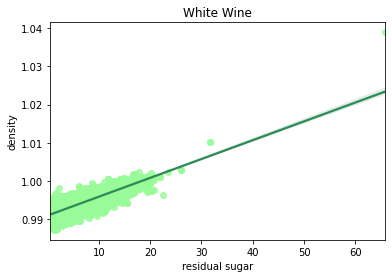

In [843]:
g = sns.regplot(data=data_w, x="residual sugar", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

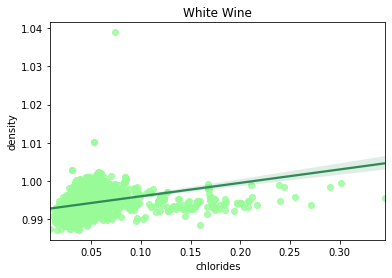

In [844]:
g = sns.regplot(data=data_w, x="chlorides", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

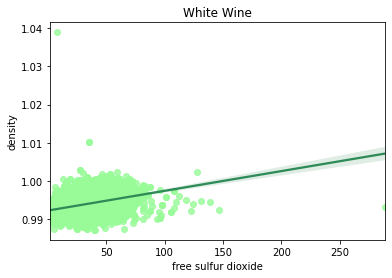

In [845]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

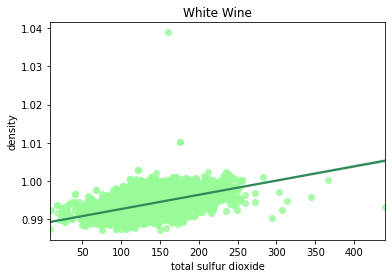

In [846]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

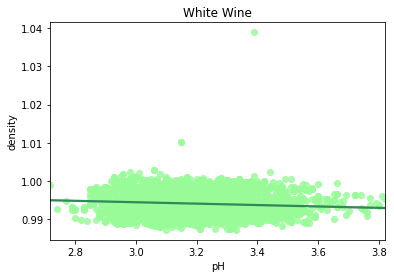

In [847]:
g = sns.regplot(data=data_w, x="pH", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

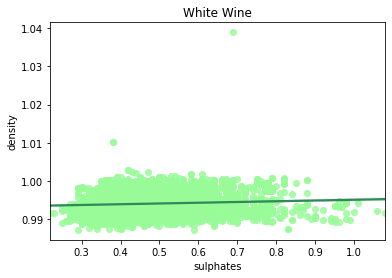

In [848]:
g = sns.regplot(data=data_w, x="sulphates", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

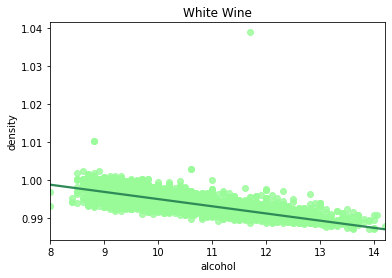

In [849]:
g = sns.regplot(data=data_w, x="alcohol", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [pH]

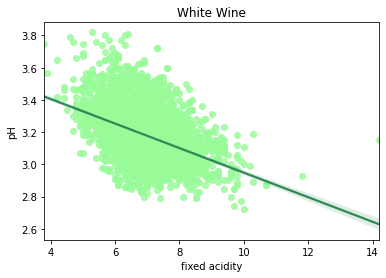

In [850]:
g = sns.regplot(data=data_w, x="fixed acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

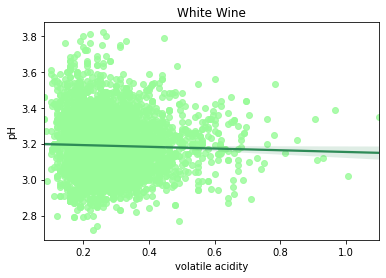

In [851]:
g = sns.regplot(data=data_w, x="volatile acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

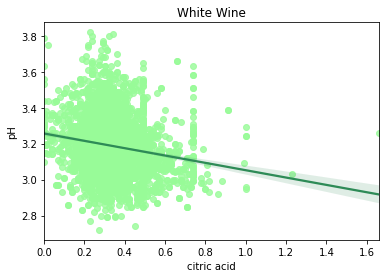

In [852]:
g = sns.regplot(data=data_w, x="citric acid", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

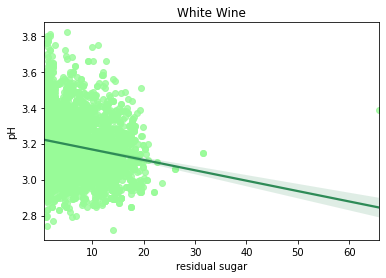

In [853]:
g = sns.regplot(data=data_w, x="residual sugar", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

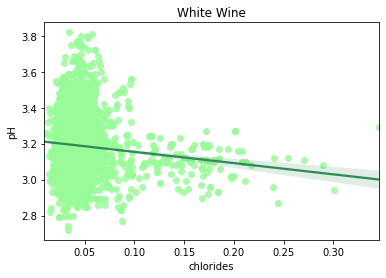

In [854]:
g = sns.regplot(data=data_w, x="chlorides", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

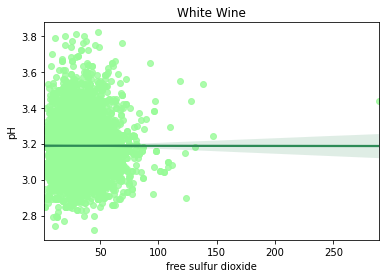

In [855]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

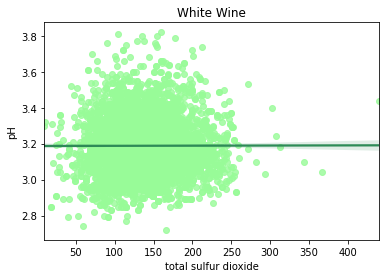

In [856]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

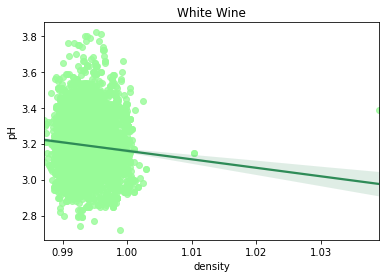

In [857]:
g = sns.regplot(data=data_w, x="density", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

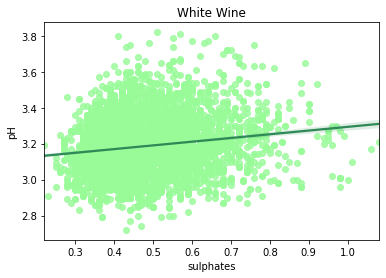

In [858]:
g = sns.regplot(data=data_w, x="sulphates", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

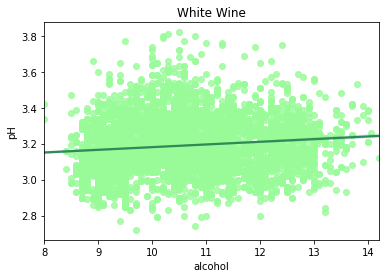

In [859]:
g = sns.regplot(data=data_w, x="alcohol", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Sulphates]

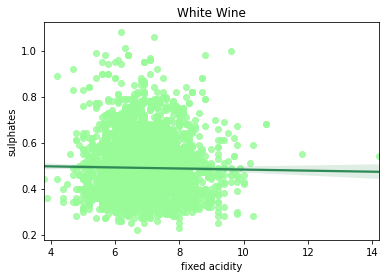

In [860]:
g = sns.regplot(data=data_w, x="fixed acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

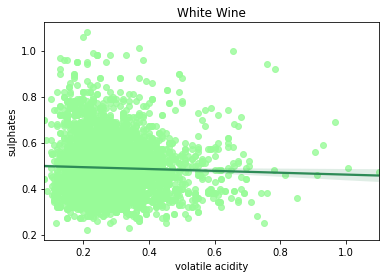

In [861]:
g = sns.regplot(data=data_w, x="volatile acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

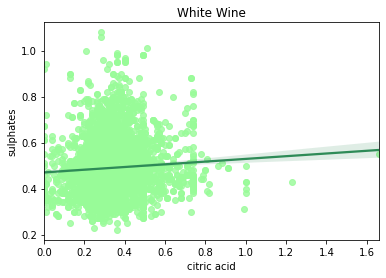

In [862]:
g = sns.regplot(data=data_w, x="citric acid", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

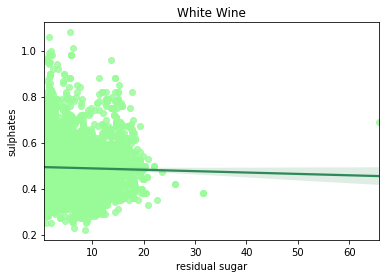

In [863]:
g = sns.regplot(data=data_w, x="residual sugar", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

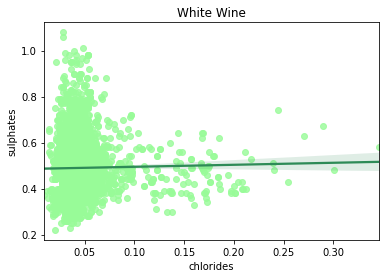

In [864]:
g = sns.regplot(data=data_w, x="chlorides", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

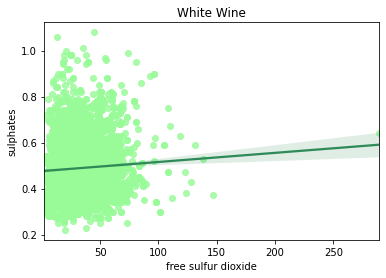

In [865]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

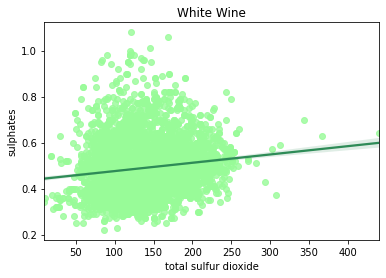

In [866]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

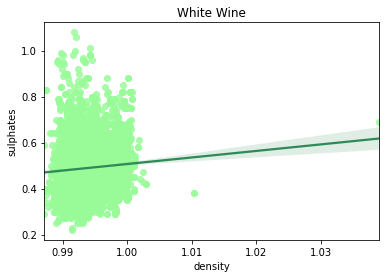

In [867]:
g = sns.regplot(data=data_w, x="density", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

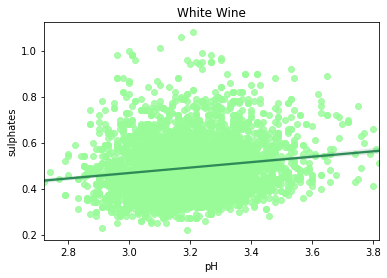

In [868]:
g = sns.regplot(data=data_w, x="pH", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

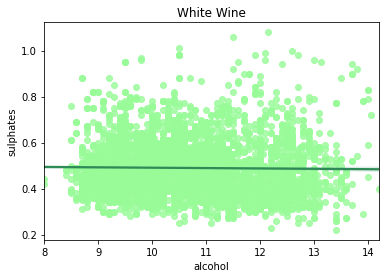

In [869]:
g = sns.regplot(data=data_w, x="alcohol", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

##### [Alcohol]

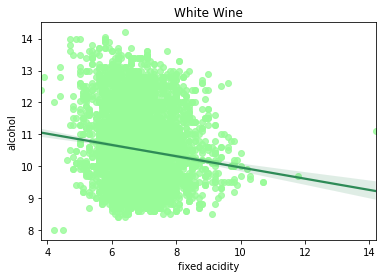

In [870]:
g = sns.regplot(data=data_w, x="fixed acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

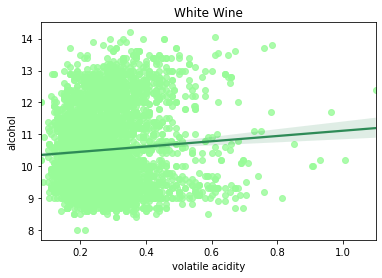

In [871]:
g = sns.regplot(data=data_w, x="volatile acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

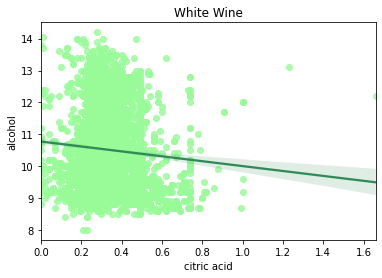

In [872]:
g = sns.regplot(data=data_w, x="citric acid", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

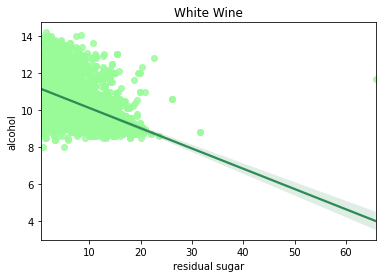

In [873]:
g = sns.regplot(data=data_w, x="residual sugar", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

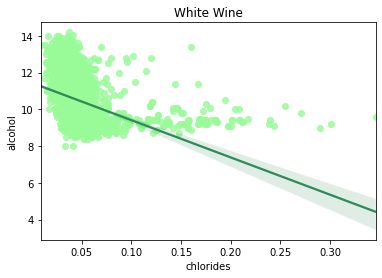

In [874]:
g = sns.regplot(data=data_w, x="chlorides", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

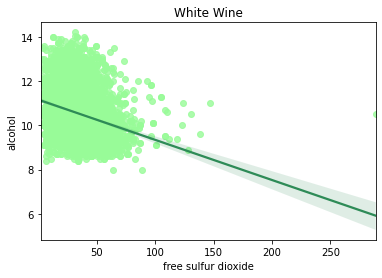

In [875]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

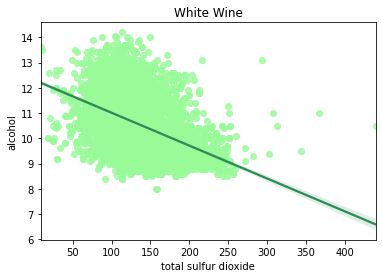

In [876]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

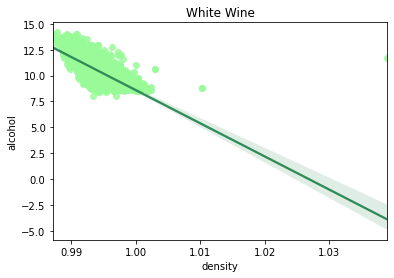

In [877]:
g = sns.regplot(data=data_w, x="density", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

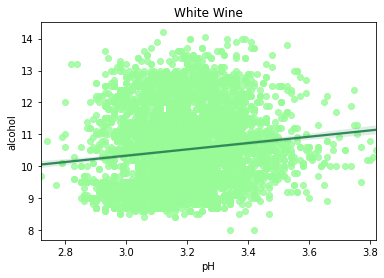

In [878]:
g = sns.regplot(data=data_w, x="pH", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

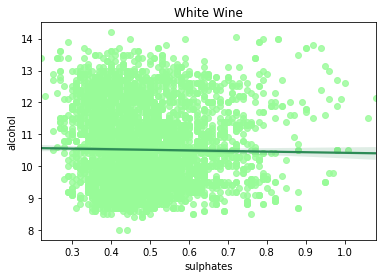

In [879]:
g = sns.regplot(data=data_w, x="sulphates", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

#### Categorical Scatterplots for Quality

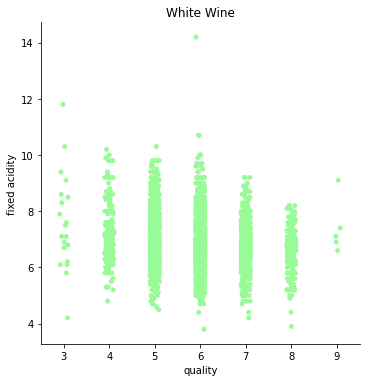

In [880]:
g = sns.catplot(data=data_w, x="quality", y="fixed acidity", color="palegreen").set(title = "White Wine")

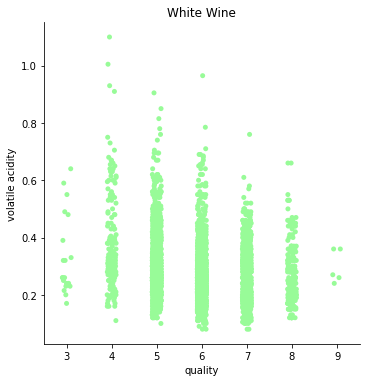

In [881]:
g = sns.catplot(data=data_w, x="quality", y="volatile acidity", color="palegreen").set(title = "White Wine")

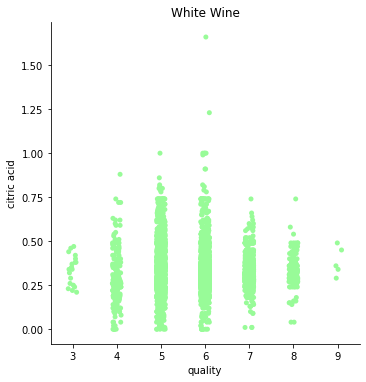

In [882]:
g = sns.catplot(data=data_w, x="quality", y="citric acid", color="palegreen").set(title = "White Wine")

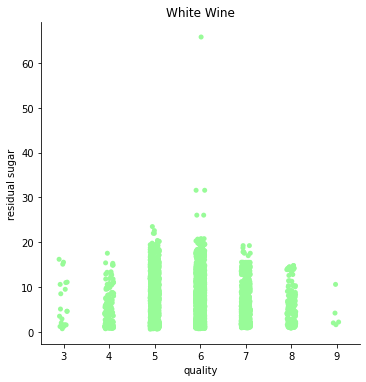

In [883]:
g = sns.catplot(data=data_w, x="quality", y="residual sugar", color="palegreen").set(title = "White Wine")

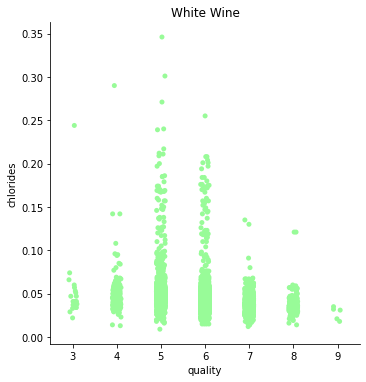

In [884]:
g = sns.catplot(data=data_w, x="quality", y="chlorides", color="palegreen").set(title = "White Wine")

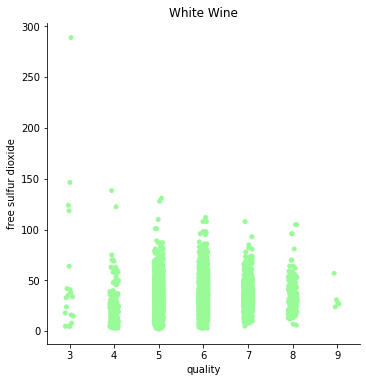

In [885]:
g = sns.catplot(data=data_w, x="quality", y="free sulfur dioxide", color="palegreen").set(title = "White Wine")

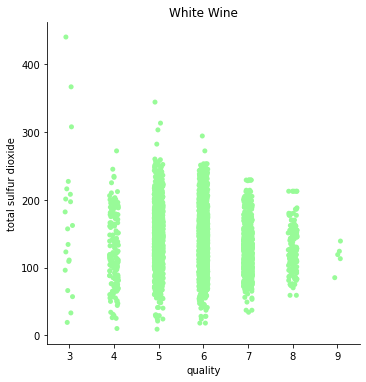

In [886]:
g = sns.catplot(data=data_w, x="quality", y="total sulfur dioxide", color="palegreen").set(title = "White Wine")

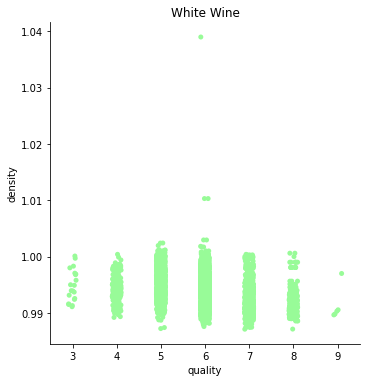

In [887]:
g = sns.catplot(data=data_w, x="quality", y="density", color="palegreen").set(title = "White Wine")

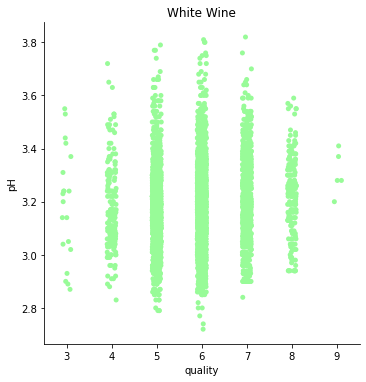

In [888]:
g = sns.catplot(data=data_w, x="quality", y="pH", color="palegreen").set(title = "White Wine")

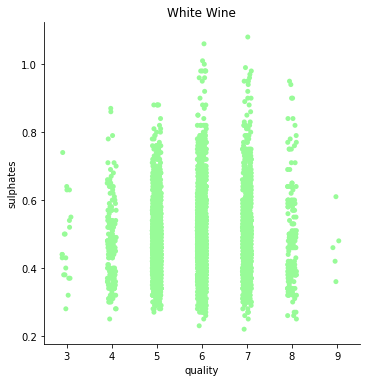

In [889]:
g = sns.catplot(data=data_w, x="quality", y="sulphates", color="palegreen").set(title = "White Wine")

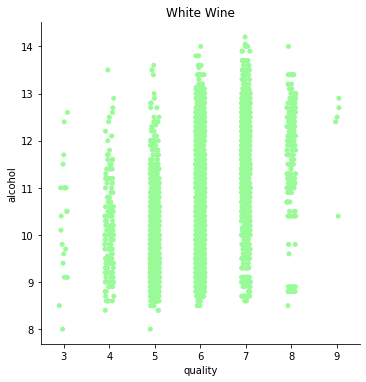

In [890]:
g = sns.catplot(data=data_w, x="quality", y="alcohol", color="palegreen").set(title = "White Wine")

#### Correlation Matrix

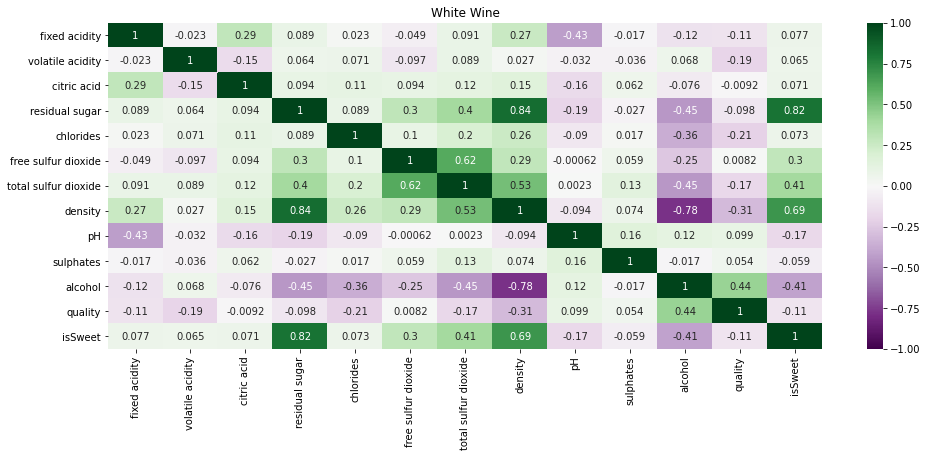

In [891]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(data_w.corr(), vmin=-1, vmax=1, annot=True, cmap='PRGn').set(title = "White Wine")

### Red Wine

#### Scatter Plots with Regression Lines

##### [Fixed Acidity]

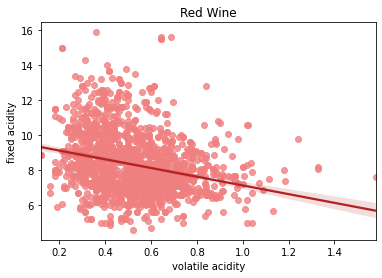

In [892]:
g = sns.regplot(data=data_r, x="volatile acidity", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

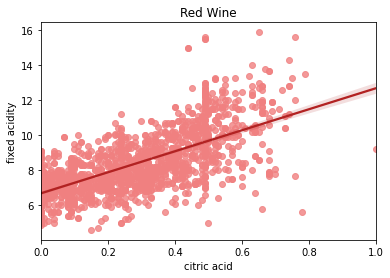

In [893]:
g = sns.regplot(data=data_r, x="citric acid", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

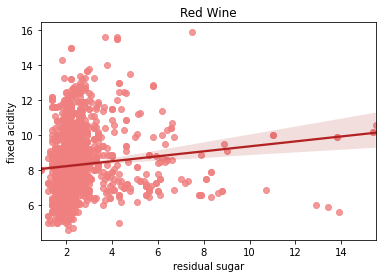

In [894]:
g = sns.regplot(data=data_r, x="residual sugar", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

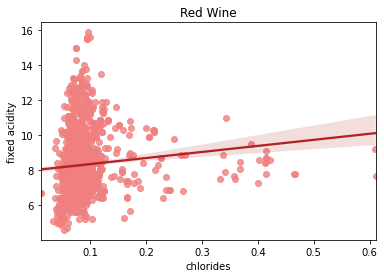

In [895]:
g = sns.regplot(data=data_r, x="chlorides", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

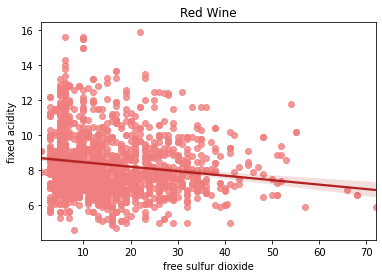

In [896]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

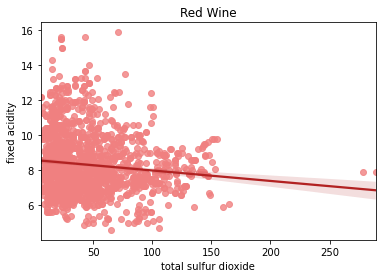

In [897]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

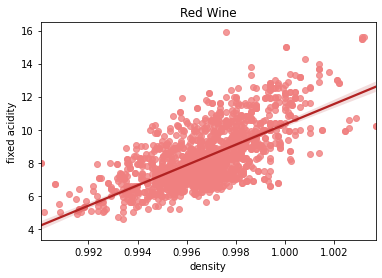

In [898]:
g = sns.regplot(data=data_r, x="density", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

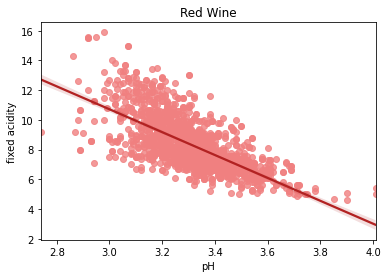

In [899]:
g = sns.regplot(data=data_r, x="pH", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

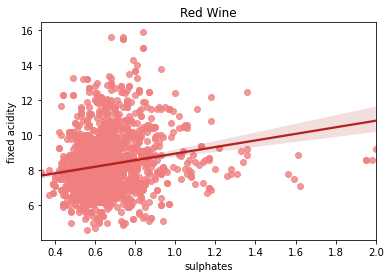

In [900]:
g = sns.regplot(data=data_r, x="sulphates", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

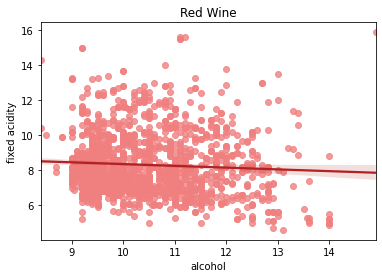

In [901]:
g = sns.regplot(data=data_r, x="alcohol", y="fixed acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Volatile Acidity]

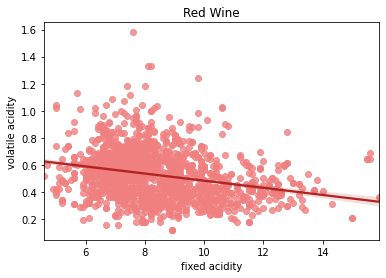

In [902]:
g = sns.regplot(data=data_r, x="fixed acidity", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

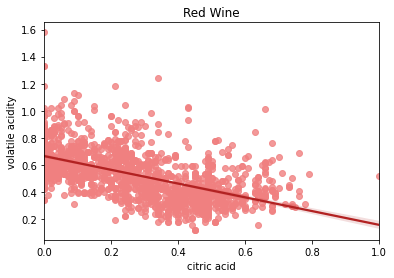

In [903]:
g = sns.regplot(data=data_r, x="citric acid", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

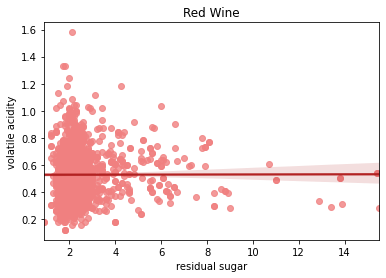

In [904]:
g = sns.regplot(data=data_r, x="residual sugar", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

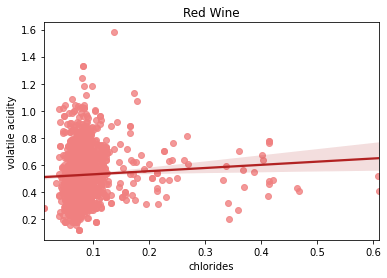

In [905]:
g = sns.regplot(data=data_r, x="chlorides", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

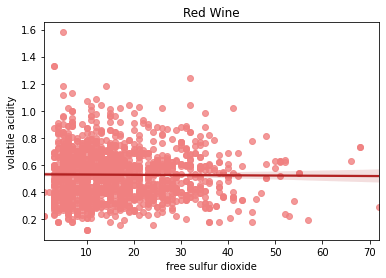

In [906]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

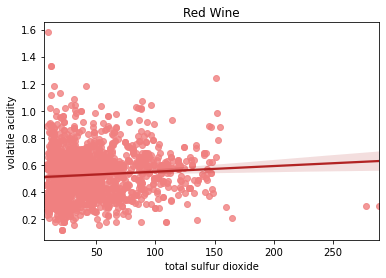

In [907]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

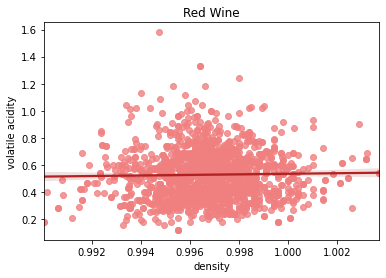

In [908]:
g = sns.regplot(data=data_r, x="density", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

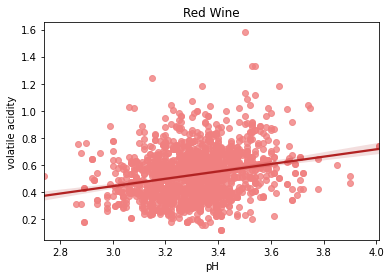

In [909]:
g = sns.regplot(data=data_r, x="pH", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

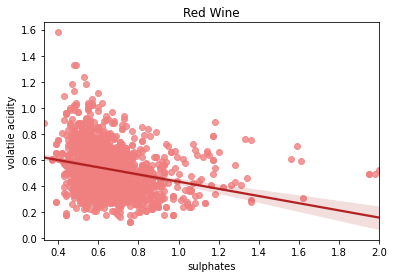

In [910]:
g = sns.regplot(data=data_r, x="sulphates", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

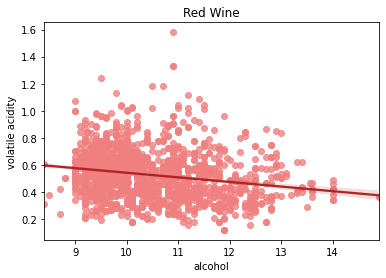

In [911]:
g = sns.regplot(data=data_r, x="alcohol", y="volatile acidity", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Citric Acid]

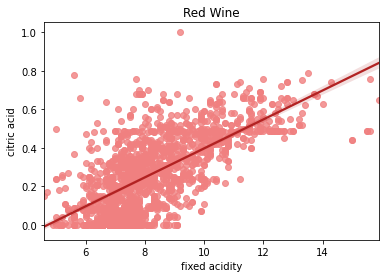

In [912]:
g = sns.regplot(data=data_r, x="fixed acidity", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

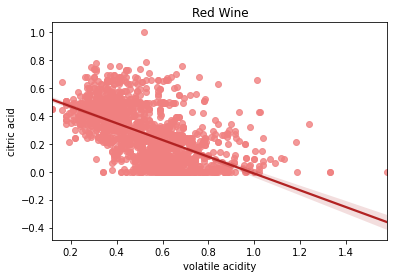

In [913]:
g = sns.regplot(data=data_r, x="volatile acidity", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

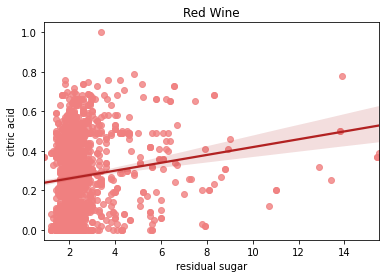

In [914]:
g = sns.regplot(data=data_r, x="residual sugar", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

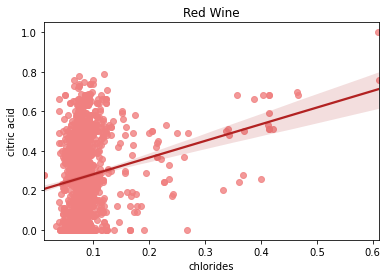

In [915]:
g = sns.regplot(data=data_r, x="chlorides", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

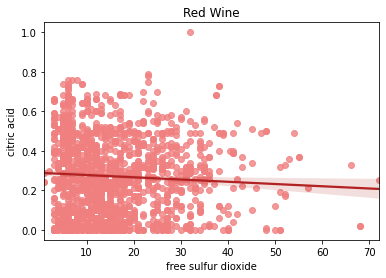

In [916]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

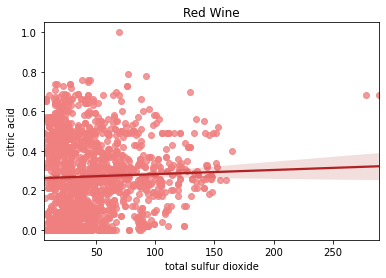

In [917]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

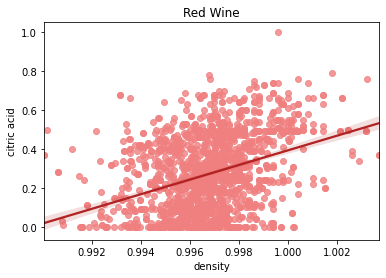

In [918]:
g = sns.regplot(data=data_r, x="density", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

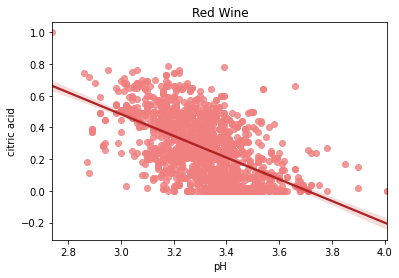

In [919]:
g = sns.regplot(data=data_r, x="pH", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

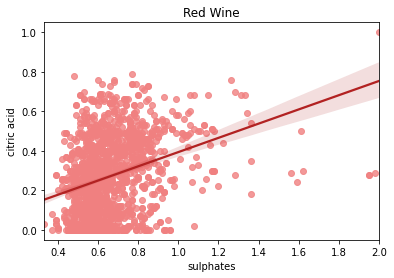

In [920]:
g = sns.regplot(data=data_r, x="sulphates", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

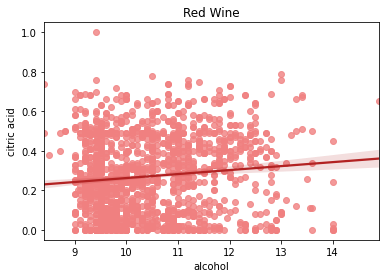

In [921]:
g = sns.regplot(data=data_r, x="alcohol", y="citric acid", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Residual Sugar]

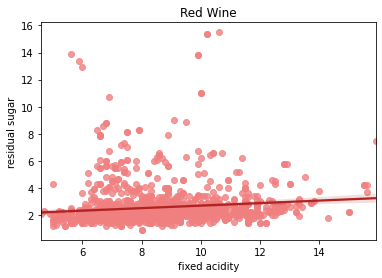

In [922]:
g = sns.regplot(data=data_r, x="fixed acidity", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

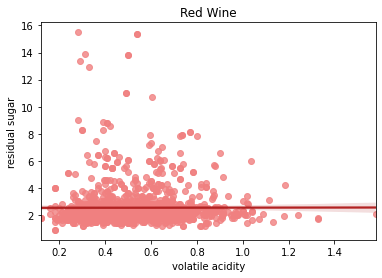

In [923]:
g = sns.regplot(data=data_r, x="volatile acidity", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

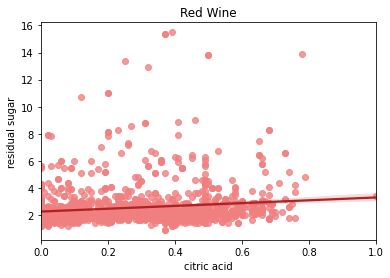

In [924]:
g = sns.regplot(data=data_r, x="citric acid", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

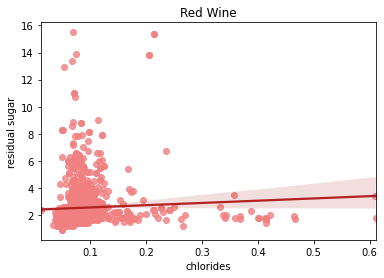

In [925]:
g = sns.regplot(data=data_r, x="chlorides", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

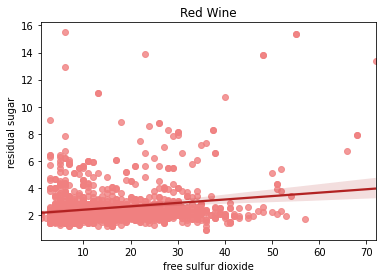

In [926]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

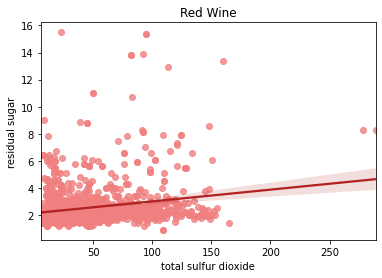

In [927]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

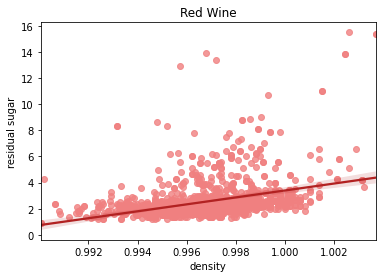

In [928]:
g = sns.regplot(data=data_r, x="density", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

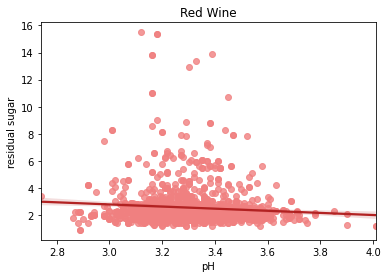

In [929]:
g = sns.regplot(data=data_r, x="pH", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

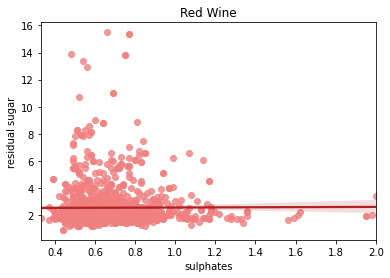

In [930]:
g = sns.regplot(data=data_r, x="sulphates", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

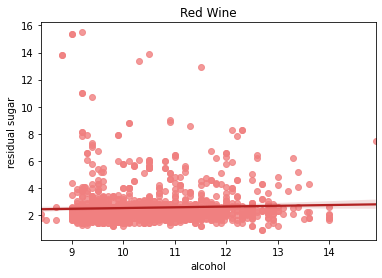

In [931]:
g = sns.regplot(data=data_r, x="alcohol", y="residual sugar", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Chlorides]

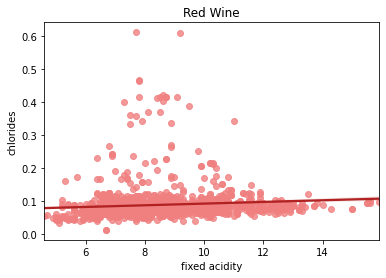

In [932]:
g = sns.regplot(data=data_r, x="fixed acidity", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

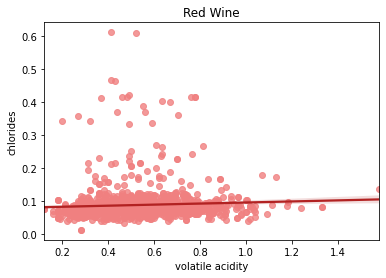

In [933]:
g = sns.regplot(data=data_r, x="volatile acidity", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

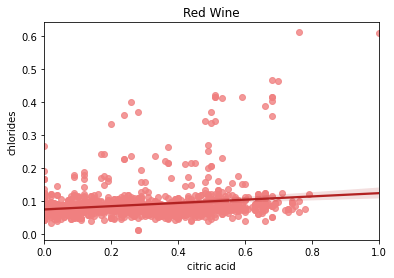

In [934]:
g = sns.regplot(data=data_r, x="citric acid", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

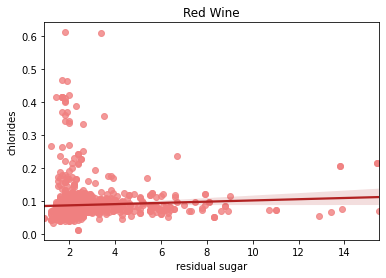

In [935]:
g = sns.regplot(data=data_r, x="residual sugar", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

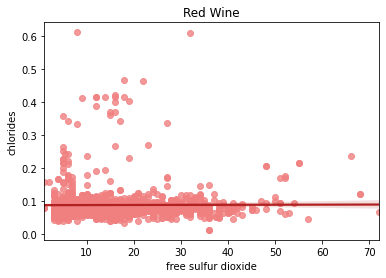

In [936]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

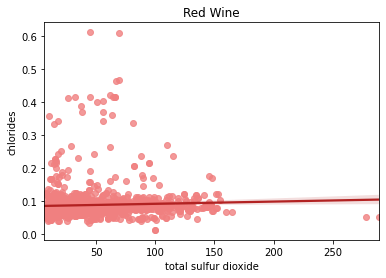

In [937]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

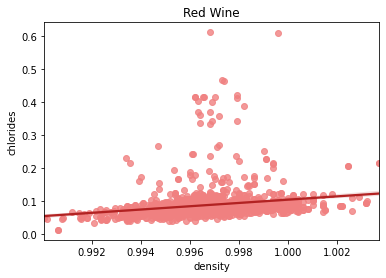

In [938]:
g = sns.regplot(data=data_r, x="density", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

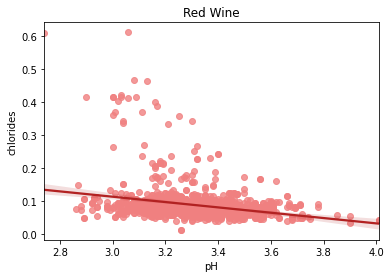

In [939]:
g = sns.regplot(data=data_r, x="pH", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

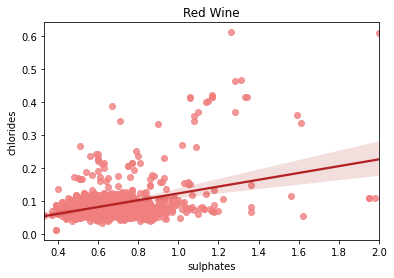

In [940]:
g = sns.regplot(data=data_r, x="sulphates", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

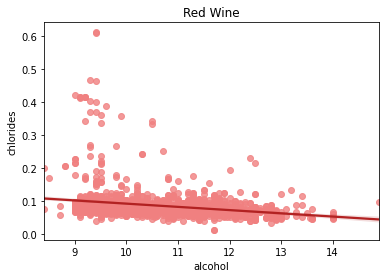

In [941]:
g = sns.regplot(data=data_r, x="alcohol", y="chlorides", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Free Sulfur Dioxide]

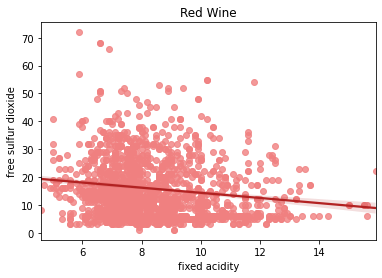

In [942]:
g = sns.regplot(data=data_r, x="fixed acidity", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

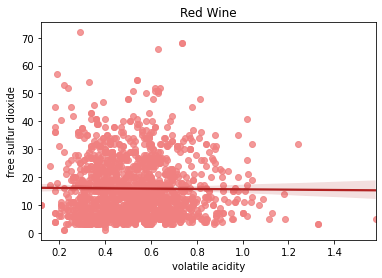

In [943]:
g = sns.regplot(data=data_r, x="volatile acidity", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

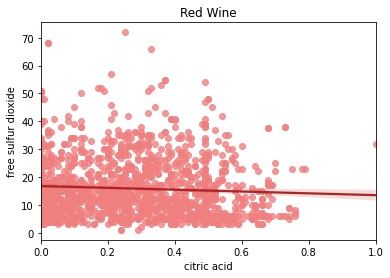

In [944]:
g = sns.regplot(data=data_r, x="citric acid", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

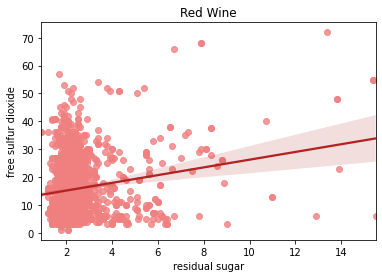

In [945]:
g = sns.regplot(data=data_r, x="residual sugar", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

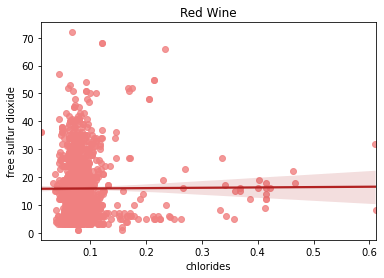

In [946]:
g = sns.regplot(data=data_r, x="chlorides", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

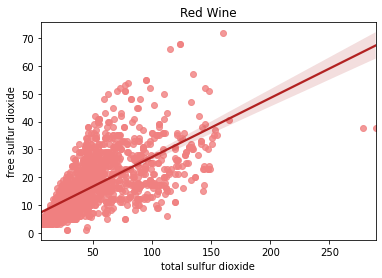

In [947]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

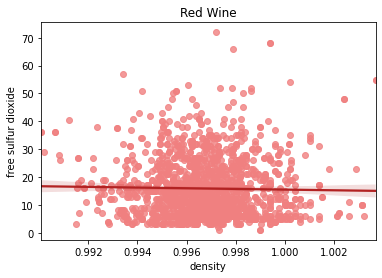

In [948]:
g = sns.regplot(data=data_r, x="density", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

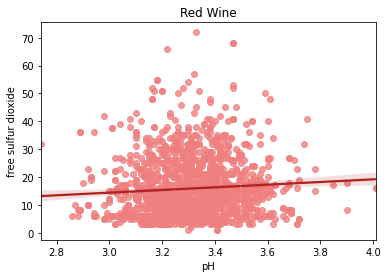

In [949]:
g = sns.regplot(data=data_r, x="pH", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

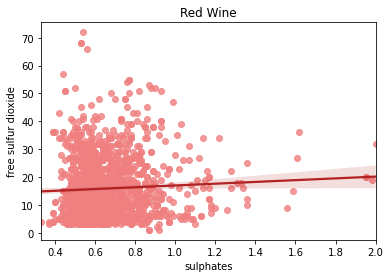

In [950]:
g = sns.regplot(data=data_r, x="sulphates", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

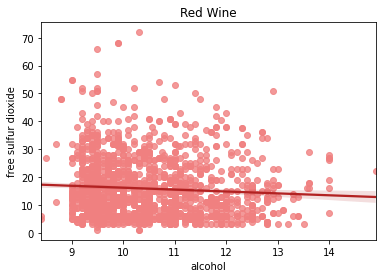

In [951]:
g = sns.regplot(data=data_r, x="alcohol", y="free sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Total Sulfur Dioxide]

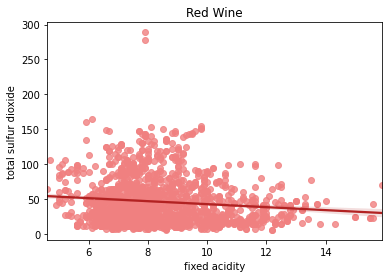

In [952]:
g = sns.regplot(data=data_r, x="fixed acidity", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

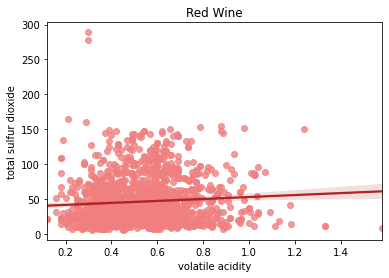

In [953]:
g = sns.regplot(data=data_r, x="volatile acidity", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

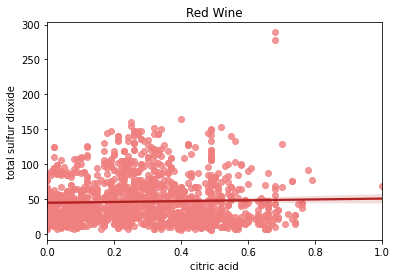

In [954]:
g = sns.regplot(data=data_r, x="citric acid", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

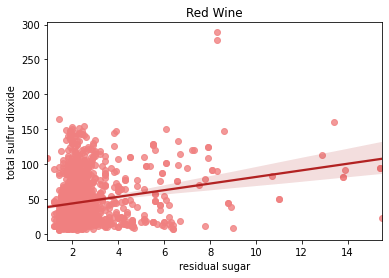

In [955]:
g = sns.regplot(data=data_r, x="residual sugar", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

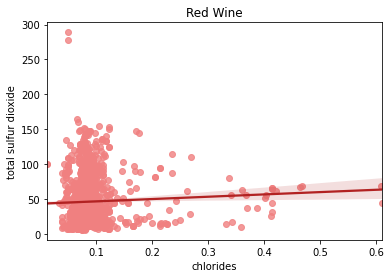

In [956]:
g = sns.regplot(data=data_r, x="chlorides", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

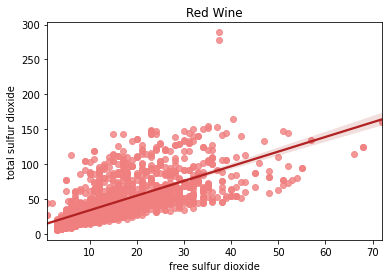

In [957]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

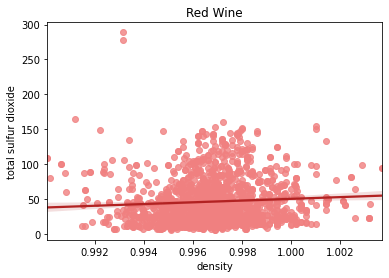

In [958]:
g = sns.regplot(data=data_r, x="density", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

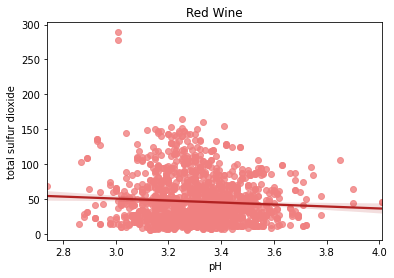

In [959]:
g = sns.regplot(data=data_r, x="pH", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

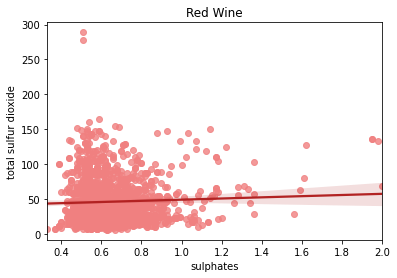

In [960]:
g = sns.regplot(data=data_r, x="sulphates", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

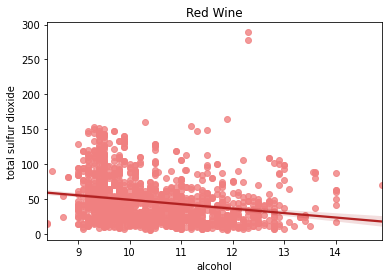

In [961]:
g = sns.regplot(data=data_r, x="alcohol", y="total sulfur dioxide", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Density]

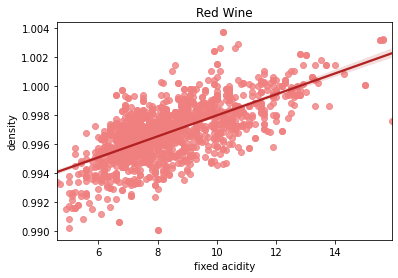

In [962]:
g = sns.regplot(data=data_r, x="fixed acidity", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

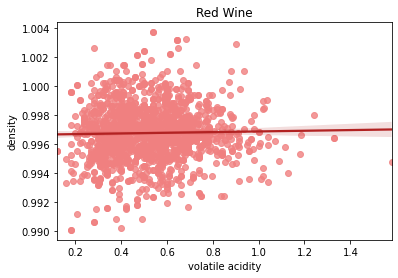

In [963]:
g = sns.regplot(data=data_r, x="volatile acidity", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

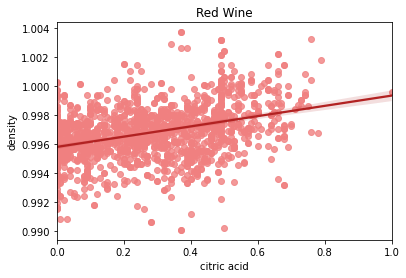

In [964]:
g = sns.regplot(data=data_r, x="citric acid", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

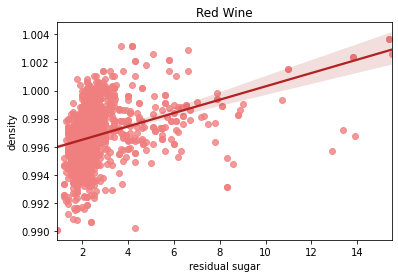

In [965]:
g = sns.regplot(data=data_r, x="residual sugar", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

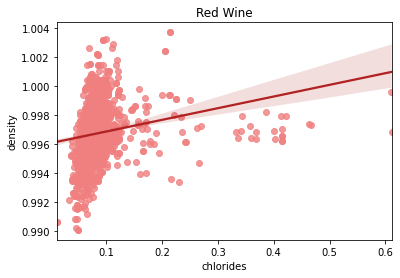

In [966]:
g = sns.regplot(data=data_r, x="chlorides", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

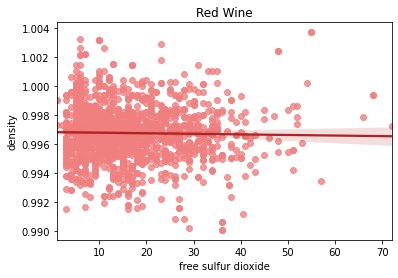

In [967]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

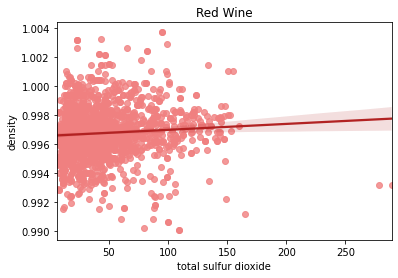

In [968]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

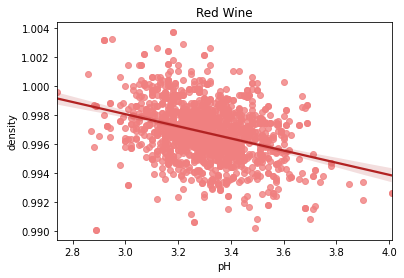

In [969]:
g = sns.regplot(data=data_r, x="pH", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

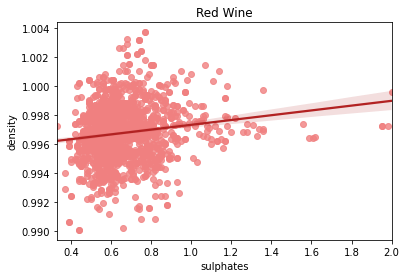

In [970]:
g = sns.regplot(data=data_r, x="sulphates", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

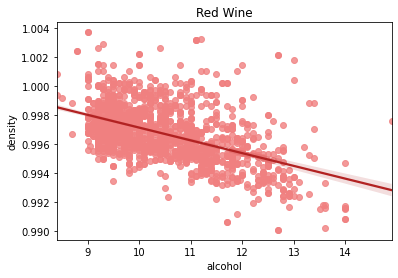

In [971]:
g = sns.regplot(data=data_r, x="alcohol", y="density", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [pH]

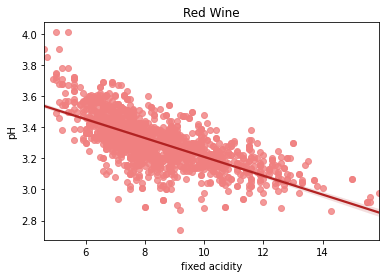

In [972]:
g = sns.regplot(data=data_r, x="fixed acidity", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

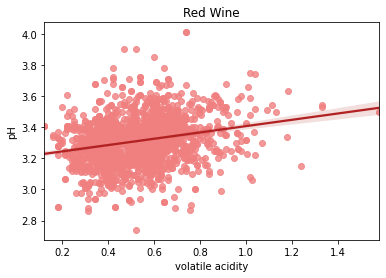

In [973]:
g = sns.regplot(data=data_r, x="volatile acidity", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

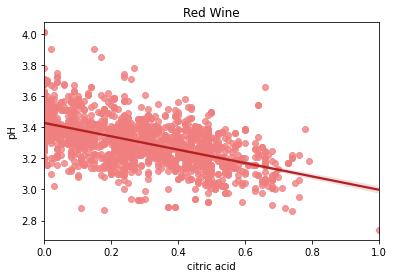

In [974]:
g = sns.regplot(data=data_r, x="citric acid", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

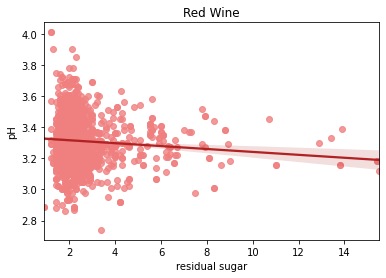

In [975]:
g = sns.regplot(data=data_r, x="residual sugar", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

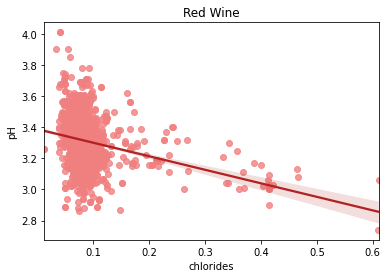

In [976]:
g = sns.regplot(data=data_r, x="chlorides", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

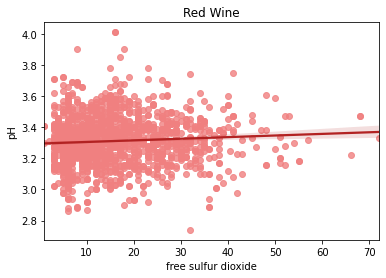

In [977]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

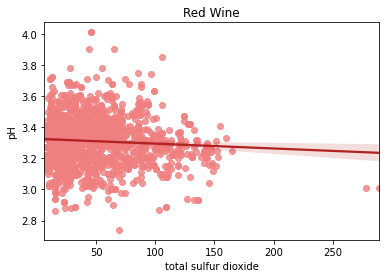

In [978]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

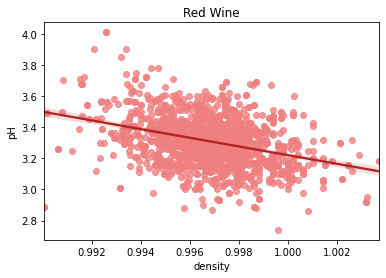

In [979]:
g = sns.regplot(data=data_r, x="density", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

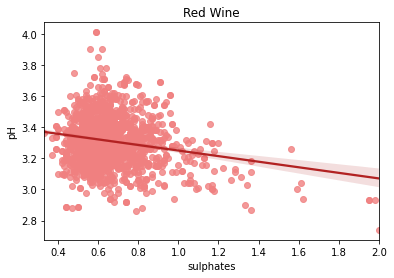

In [980]:
g = sns.regplot(data=data_r, x="sulphates", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

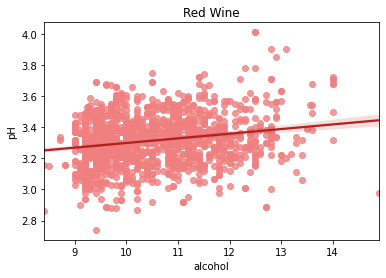

In [981]:
g = sns.regplot(data=data_r, x="alcohol", y="pH", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Sulphates]

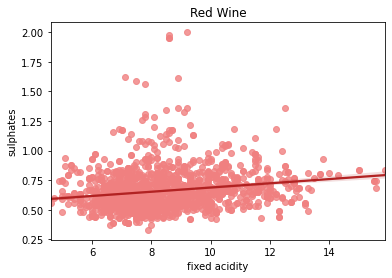

In [982]:
g = sns.regplot(data=data_r, x="fixed acidity", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

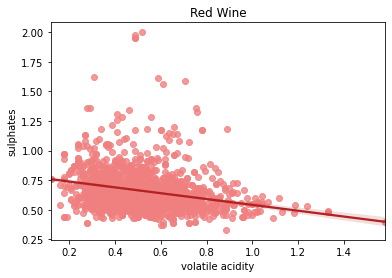

In [983]:
g = sns.regplot(data=data_r, x="volatile acidity", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

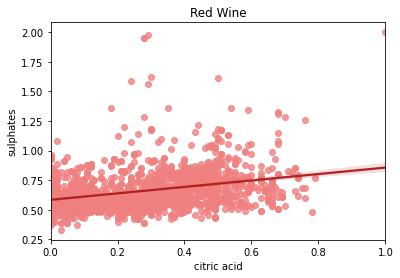

In [984]:
g = sns.regplot(data=data_r, x="citric acid", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

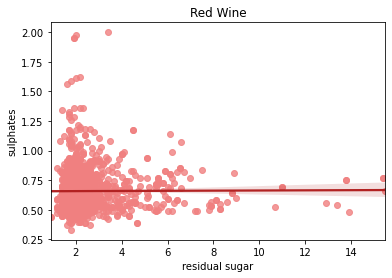

In [985]:
g = sns.regplot(data=data_r, x="residual sugar", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

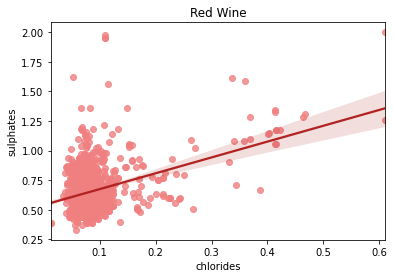

In [986]:
g = sns.regplot(data=data_r, x="chlorides", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

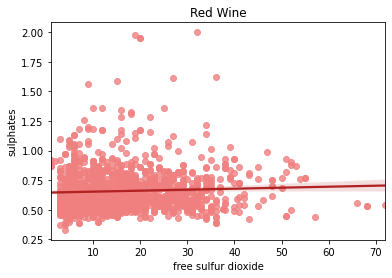

In [987]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

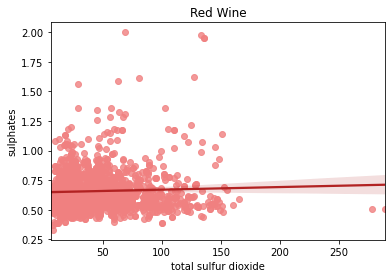

In [988]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

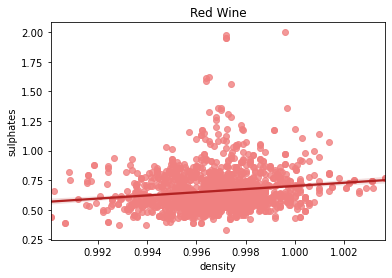

In [989]:
g = sns.regplot(data=data_r, x="density", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

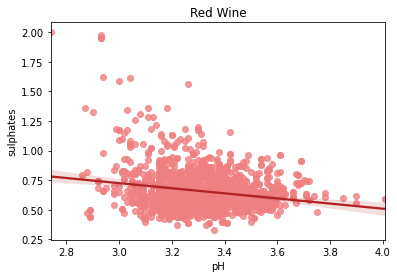

In [990]:
g = sns.regplot(data=data_r, x="pH", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

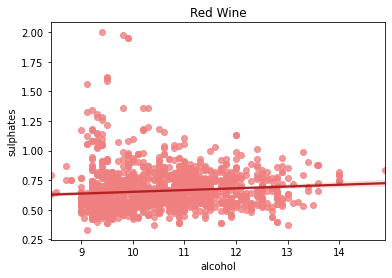

In [991]:
g = sns.regplot(data=data_r, x="alcohol", y="sulphates", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

##### [Alcohol]

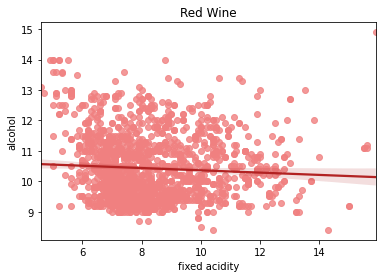

In [992]:
g = sns.regplot(data=data_r, x="fixed acidity", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

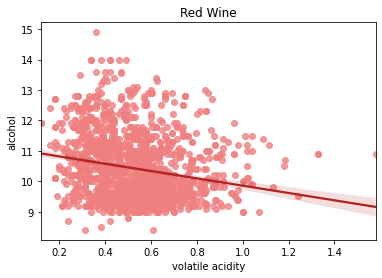

In [993]:
g = sns.regplot(data=data_r, x="volatile acidity", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

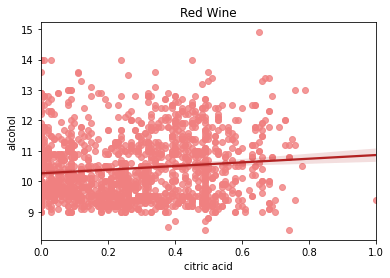

In [994]:
g = sns.regplot(data=data_r, x="citric acid", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

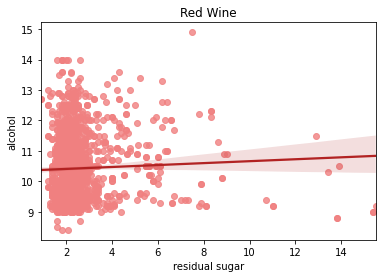

In [995]:
g = sns.regplot(data=data_r, x="residual sugar", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

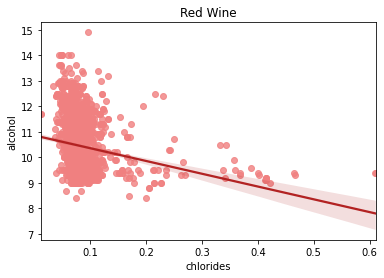

In [996]:
g = sns.regplot(data=data_r, x="chlorides", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

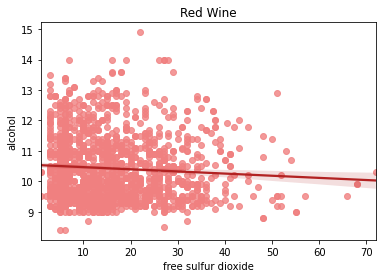

In [997]:
g = sns.regplot(data=data_r, x="free sulfur dioxide", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

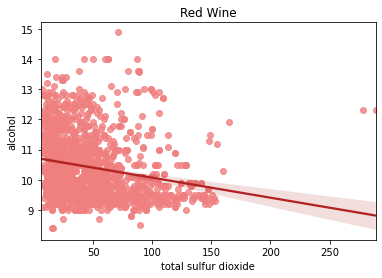

In [998]:
g = sns.regplot(data=data_r, x="total sulfur dioxide", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

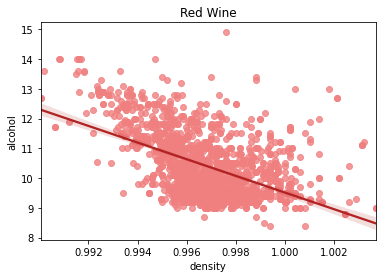

In [999]:
g = sns.regplot(data=data_r, x="density", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

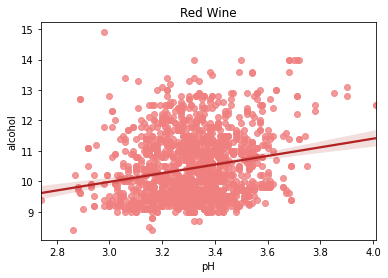

In [1000]:
g = sns.regplot(data=data_r, x="pH", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

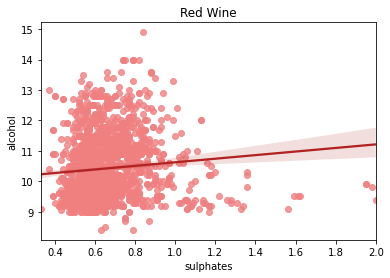

In [1001]:
g = sns.regplot(data=data_r, x="sulphates", y="alcohol", scatter_kws={"color":"lightcoral"}, line_kws={"color":"firebrick"}).set(title = "Red Wine")

#### Categorical Scatterplots for Quality

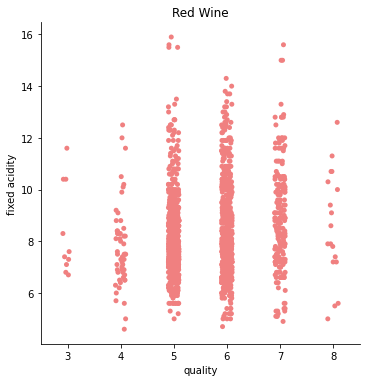

In [1002]:
g = sns.catplot(data=data_r, x="quality", y="fixed acidity", color="lightcoral").set(title = "Red Wine")

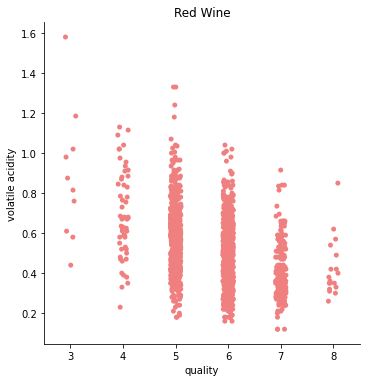

In [1003]:
g = sns.catplot(data=data_r, x="quality", y="volatile acidity", color="lightcoral").set(title = "Red Wine")

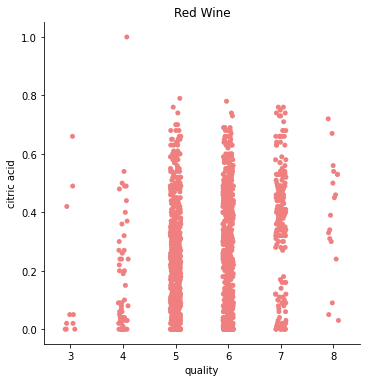

In [1004]:
g = sns.catplot(data=data_r, x="quality", y="citric acid", color="lightcoral").set(title = "Red Wine")

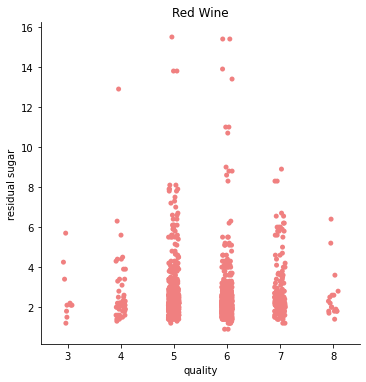

In [1005]:
g = sns.catplot(data=data_r, x="quality", y="residual sugar", color="lightcoral").set(title = "Red Wine")

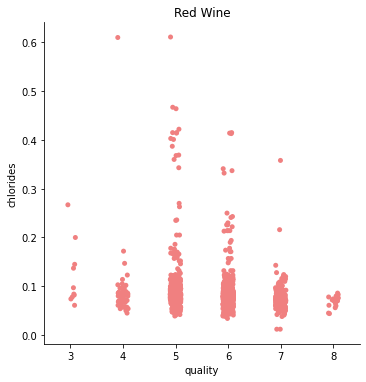

In [1006]:
g = sns.catplot(data=data_r, x="quality", y="chlorides", color="lightcoral").set(title = "Red Wine")

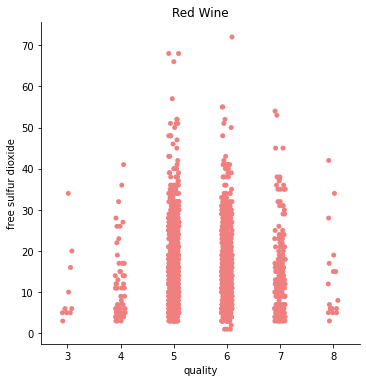

In [1007]:
g = sns.catplot(data=data_r, x="quality", y="free sulfur dioxide", color="lightcoral").set(title = "Red Wine")

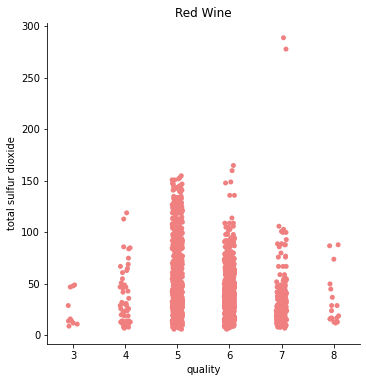

In [1008]:
g = sns.catplot(data=data_r, x="quality", y="total sulfur dioxide", color="lightcoral").set(title = "Red Wine")

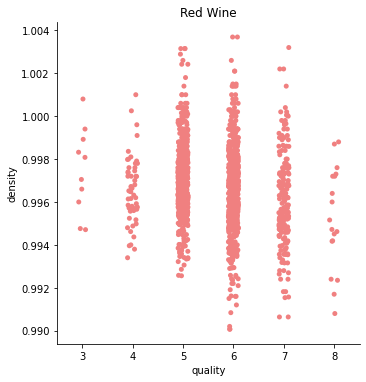

In [1009]:
g = sns.catplot(data=data_r, x="quality", y="density", color="lightcoral").set(title = "Red Wine")

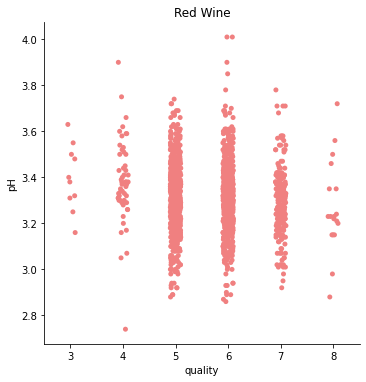

In [1010]:
g = sns.catplot(data=data_r, x="quality", y="pH", color="lightcoral").set(title = "Red Wine")

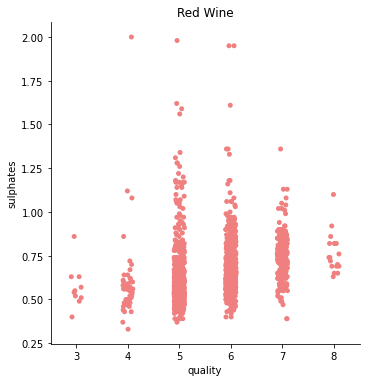

In [1011]:
g = sns.catplot(data=data_r, x="quality", y="sulphates", color="lightcoral").set(title = "Red Wine")

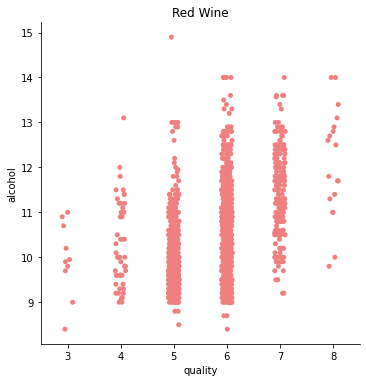

In [1012]:
g = sns.catplot(data=data_r, x="quality", y="alcohol", color="lightcoral").set(title = "Red Wine")

#### Correlation Matrix

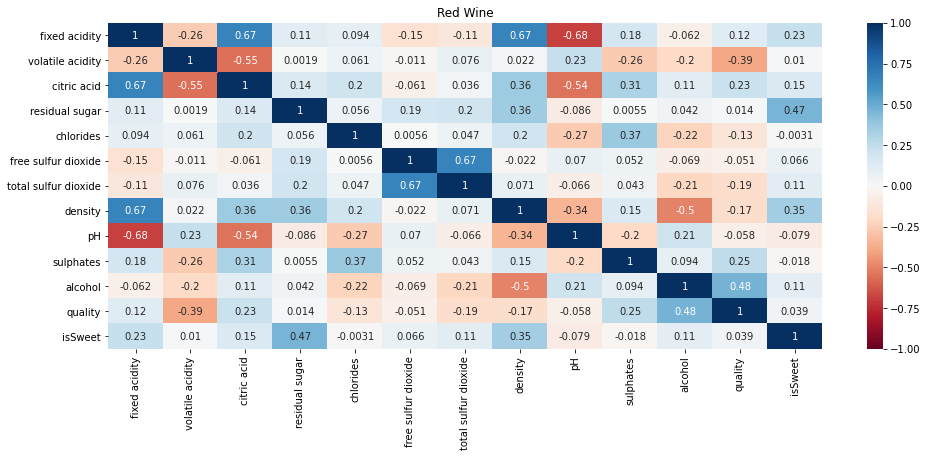

In [1013]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(data_r.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu').set(title = "Red Wine")

## Modelling

### White Wine

#### One-Hot Encoding

In [1181]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  quality  alcohol_cat  isSweet
0            7.0              0.27         0.36  ...        6            L        1
1            6.3              0.30         0.34  ...        6            M        0
2            8.1              0.28         0.40  ...        6            M        1
3            7.2              0.23         0.32  ...        6            M        1
4            7.2              0.23         0.32  ...        6            M        1

[5 rows x 14 columns]

In [1182]:
dummies = []
dummies.append(pd.get_dummies(data_w["alcohol_cat"]))
df_dummies = pd.concat(dummies, axis=1)
data_w = pd.concat((data_w, df_dummies), axis=1)
data_w = data_w.drop(["alcohol_cat"], axis=1)

In [1183]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

#### Classification Modelling

##### Pre-Processing

In [1017]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

Converting Quality into a binary variable

In [1018]:
data_bin_w = data_w.rename(columns={"quality":"quality_cat"})
for index, series in data_bin_w.iterrows():
    quality = series["quality_cat"]
    if quality < 6:
        data_bin_w.loc[index, "quality_cat"] = 0
    else:
        data_bin_w.loc[index, "quality_cat"] = 1

In [1019]:
data_bin_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

Quality is unbalanced

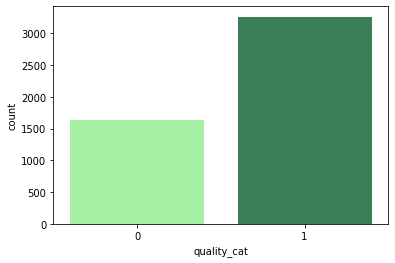

In [1020]:
g = sns.countplot(x="quality_cat", data=data_bin_w, palette={0:"palegreen",1:"seagreen"})

In [1021]:
X = data_bin_w.drop(["quality_cat"], axis=1).values
Q = data_bin_w["quality_cat"].values

Split 20% for test set and apply SMOTE to balance training set

In [1022]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

XTrain, QTrain = SMOTE().fit_resample(XTrain, QTrain)
print(Counter(QTrain))

Counter({1: 2589, 0: 2589})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Scale data

In [1023]:
scaler = StandardScaler()
XTrain, XTest = (scaler.fit_transform(d) for d in (XTrain, XTest))

##### Logistic Regression

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2589
           1       0.76      0.70      0.73      2589

    accuracy                           0.74      5178
   macro avg       0.74      0.74      0.74      5178
weighted avg       0.74      0.74      0.74      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.50      0.83      0.62       311
           1       0.89      0.61      0.73       669

    accuracy                           0.68       980
   macro avg       0.69      0.72      0.67       980
weighted avg       0.76      0.68      0.69       980

Cross-validation scores: 0.73 (± 0.01)


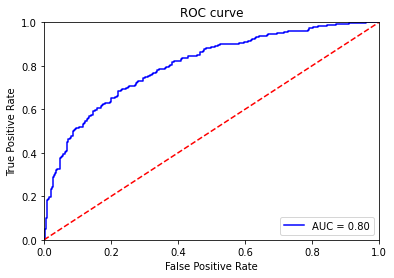

In [1024]:
clf = LogisticRegression(penalty='l2', C=1, solver='lbfgs',multi_class='auto')
clf.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

Hyper-Parameter Tuning

In [1025]:
tuned_parameters = [{'C': [1, 10, 100]}]

clf = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto'), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 1}

Grid scores on development set:

0.738 (± 0.016) for {'C': 1}

0.738 (± 0.015) for {'C': 10}

0.738 (± 0.014) for {'C': 100}



##### SVC

###### Linear

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      2589
           1       0.76      0.67      0.71      2589

    accuracy                           0.73      5178
   macro avg       0.74      0.73      0.73      5178
weighted avg       0.74      0.73      0.73      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.49      0.83      0.61       311
           1       0.88      0.60      0.71       669

    accuracy                           0.67       980
   macro avg       0.68      0.71      0.66       980
weighted avg       0.76      0.67      0.68       980

Cross-validation scores: 0.73 (± 0.01)


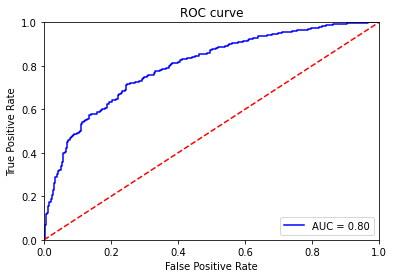

In [1026]:
svm = SVC(kernel='linear')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Poly

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2589
           1       0.82      0.76      0.79      2589

    accuracy                           0.80      5178
   macro avg       0.80      0.80      0.80      5178
weighted avg       0.80      0.80      0.80      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.53      0.77      0.63       311
           1       0.87      0.68      0.76       669

    accuracy                           0.71       980
   macro avg       0.70      0.73      0.69       980
weighted avg       0.76      0.71      0.72       980

Cross-validation scores: 0.77 (± 0.03)


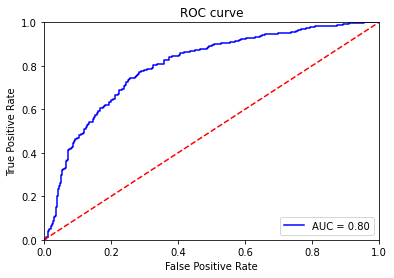

In [1027]:
svm = SVC(kernel='poly')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### RBF

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2589
           1       0.83      0.80      0.81      2589

    accuracy                           0.82      5178
   macro avg       0.82      0.82      0.82      5178
weighted avg       0.82      0.82      0.82      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       311
           1       0.87      0.73      0.79       669

    accuracy                           0.74       980
   macro avg       0.72      0.75      0.72       980
weighted avg       0.77      0.74      0.75       980

Cross-validation scores: 0.78 (± 0.04)


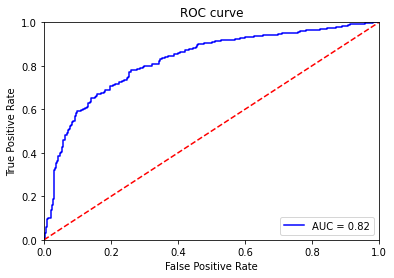

In [1028]:
svm = SVC(kernel='rbf')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

###### Hyper-Parameter Tuning

In [1029]:
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.791 (± 0.051) for {'C': 1, 'kernel': 'rbf'}

0.808 (± 0.058) for {'C': 10, 'kernel': 'rbf'}

0.827 (± 0.069) for {'C': 100, 'kernel': 'rbf'}

0.774 (± 0.051) for {'C': 1, 'kernel': 'poly'}

0.791 (± 0.045) for {'C': 10, 'kernel': 'poly'}

0.790 (± 0.069) for {'C': 100, 'kernel': 'poly'}

0.730 (± 0.017) for {'C': 1, 'kernel': 'linear'}

0.729 (± 0.015) for {'C': 10, 'kernel': 'linear'}

0.729 (± 0.015) for {'C': 100, 'kernel': 'linear'}



##### Decision Tree

Train Set Predictions Report

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2589
           1       0.90      0.89      0.89      2589

    accuracy                           0.90      5178
   macro avg       0.90      0.90      0.90      5178
weighted avg       0.90      0.90      0.90      5178

Test Set Predictions Report

              precision    recall  f1-score   support

           0       0.38      0.79      0.51       311
           1       0.80      0.40      0.53       669

    accuracy                           0.52       980
   macro avg       0.59      0.59      0.52       980
weighted avg       0.67      0.52      0.52       980

Cross-validation scores: 0.77 (± 0.02)


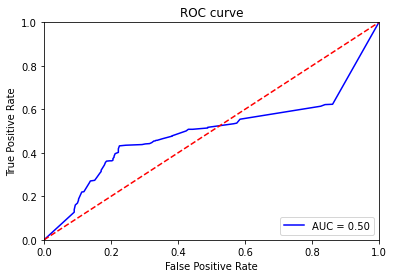

In [1030]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

##### Random Forest

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2589
           1       1.00      1.00      1.00      2589

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.38      0.97      0.55       311
           1       0.96      0.27      0.42       669

    accuracy                           0.49       980
   macro avg       0.67      0.62      0.49       980
weighted avg       0.78      0.49      0.46       980

Cross-validation scores: 0.85 (± 0.06)


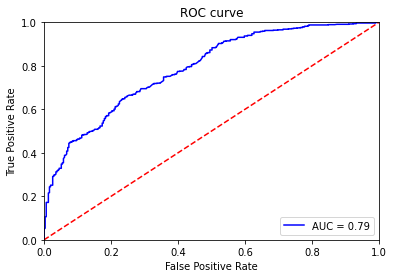

In [1031]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=10)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [1032]:
tuned_parameters = [{'n_estimators': [10,50,100,200],
                     'max_depth': [5,10,20,50]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'max_depth': 20, 'n_estimators': 200}

Grid scores on development set:

0.767 (± 0.052) for {'max_depth': 5, 'n_estimators': 10}

0.780 (± 0.038) for {'max_depth': 5, 'n_estimators': 50}

0.781 (± 0.049) for {'max_depth': 5, 'n_estimators': 100}

0.779 (± 0.043) for {'max_depth': 5, 'n_estimators': 200}

0.813 (± 0.065) for {'max_depth': 10, 'n_estimators': 10}

0.828 (± 0.054) for {'max_depth': 10, 'n_estimators': 50}

0.829 (± 0.063) for {'max_depth': 10, 'n_estimators': 100}

0.831 (± 0.057) for {'max_depth': 10, 'n_estimators': 200}

0.832 (± 0.056) for {'max_depth': 20, 'n_estimators': 10}

0.859 (± 0.076) for {'max_depth': 20, 'n_estimators': 50}

0.861 (± 0.076) for {'max_depth': 20, 'n_estimators': 100}

0.863 (± 0.073) for {'max_depth': 20, 'n_estimators': 200}

0.834 (± 0.062) for {'max_depth': 50, 'n_estimators': 10}

0.857 (± 0.062) for {'max_depth': 50, 'n_estimators': 50}

0.861 (± 0.072) for {'max_depth': 50, 'n_estimators'

##### KNN

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2589
           1       0.90      0.84      0.87      2589

    accuracy                           0.88      5178
   macro avg       0.88      0.88      0.88      5178
weighted avg       0.88      0.88      0.88      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       311
           1       0.85      0.72      0.78       669

    accuracy                           0.72       980
   macro avg       0.70      0.72      0.70       980
weighted avg       0.75      0.72      0.73       980

Cross-validation scores: 0.78 (± 0.03)


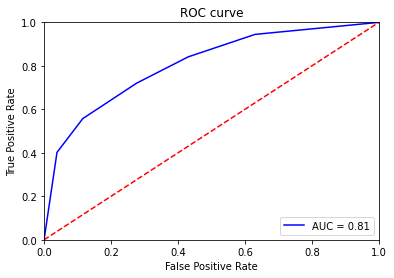

In [1033]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

print("Cross-validation scores")
scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(clf, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

###### Hyper-Parameter Tuning

In [1034]:
tuned_parameters = [{'n_neighbors': [5, 10, 25, 50]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on development set:

0.794 (± 0.028) for {'n_neighbors': 5}

0.779 (± 0.033) for {'n_neighbors': 10}

0.769 (± 0.021) for {'n_neighbors': 25}

0.753 (± 0.024) for {'n_neighbors': 50}



#### Regression Modelling

##### Pre-Processing

In [1184]:
data_w.head()

fixed acidity  volatile acidity  citric acid  ...  H  L  M
0            7.0              0.27         0.36  ...  0  1  0
1            6.3              0.30         0.34  ...  0  0  1
2            8.1              0.28         0.40  ...  0  0  1
3            7.2              0.23         0.32  ...  0  0  1
4            7.2              0.23         0.32  ...  0  0  1

[5 rows x 16 columns]

In [1185]:
X = data_w.drop(["quality"], axis=1).values
Q = data_w["quality"].values

Split 20% for test set

In [1186]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

##### Linear Regression

In [1187]:
reg = LinearRegression()
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores: 0.27 (± 0.04)
MSE:  0.5482307327826745
RMSE:  0.7404260481524637


##### SVR

###### Linear

In [1188]:
reg = SVR(kernel='linear')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores: 0.27 (± 0.04)
MSE:  0.5567608775364067
RMSE:  0.7461641089843485


###### Poly

In [1189]:
reg = SVR(kernel='poly')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores: 0.27 (± 0.04)
MSE:  0.6713623806993232
RMSE:  0.8193670610290136


###### RBF

In [1190]:
reg = SVR(kernel='rbf')
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

Cross-validation scores: 0.27 (± 0.04)
MSE:  0.6521622111702988
RMSE:  0.8075656079664976


###### Hyper-Parameter Tuning

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

reg = GridSearchCV(SVR(), tuned_parameters, cv=5)
reg.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(reg.best_params_)
print("\nGrid scores on development set:\n")

means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, reg.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

##### Decision Tree

In [ ]:
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

##### Random Forest

In [ ]:
reg = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=10)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

###### Hyper-Parameter Tuning

In [ ]:
tuned_parameters = [{'n_estimators': [10,50,100,200],
                     'max_depth': [5,10,20,50]}]
reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5)
reg.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(reg.best_params_)
print("\nGrid scores on development set:\n")

means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, reg.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

##### KNN

In [ ]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = reg.predict(XTrain)

# predictions on test set
Q_pred_Test = reg.predict(XTest)

print("Cross-validation scores")
scores = cross_val_score(reg, XTrain, QTrain, cv=3)
print(f"Training set: {scores.mean():.2f} (± {scores.std() * 2:.2f})")
scores = cross_val_score(reg, XTest, QTest, cv=3)
print(f"Test set: {scores.mean():.2f} (± {scores.std() * 2:.2f})\n")

print("MSE: ", mean_squared_error(QTest, Q_pred_Test))
print("RMSE: ", np.sqrt(mean_squared_error(QTest, Q_pred_Test)))

###### Hyper-Parameter Tuning

In [ ]:
tuned_parameters = [{'n_neighbors': [5, 10, 25, 50]}]

reg = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5)
reg.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(reg.best_params_)
print("\nGrid scores on development set:\n")

means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, reg.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")